# 2019 Index of Economic Freedom – Problem Statement

## Background:

Created in 1995 by the Heritage Foundation, The Index of economic freedom, is a ranking created to measure the economic freedom in the countries of the world. Now, in its 25th edition, The Economic Freedom Index is poised to help readers track over two decades of the advancement in economic freedom, prosperity, and opportunity and promote these ideas in their homes, schools, and communities. The Index covers 12 freedoms – from property rights to financial freedom – in 186 countries.

## Source of the data: 
This dataset belongs to The Heritage Foundation: https://www.heritage.org/index. This dataset is freely available to download on their website.

## Data Set:

The data (last updated 26/02/2019) is presented in CSV format as follows:

- CountryID, = ID 
- Country Name, - Name in full
- WEBNAME, - Name without space
- Region, - Countries are divided into 5 regions
- World Rank, - World rank of the country among other nations
- Region Rank, - Regional rank
- 2019 Score, - Score in 2019
- Property Rights, link: https://tcdata360.worldbank.org/indicators/prop.rgt.scr?country=BRA&indicator=750&viz=line_chart&years=2013,2018
- Judical Effectiveness, 
- Government Integrity, - for CPI (need to verify again)
- Tax Burden, 
- Gov't Spending, 
- Fiscal Health, 
- Business Freedom, 
- Labor Freedom, 
- Monetary Freedom, 
- Trade Freedom, 
- Investment Freedom, 
- Financial Freedom, 
- Tariff Rate (%), 
- Income Tax Rate (%), 
- Corporate Tax Rate (%), 
- Tax Burden % of GDP, 
- Gov't Expenditure % of GDP , 
- Country, Population (Millions), 
- "GDP (Billions, PPP)", 
- GDP Growth Rate (%), 
- 5 Year GDP Growth Rate (%), 
- GDP per Capita (PPP), 
- Unemployment (%), 
- Inflation (%), 
- FDI Inflow (Millions), 
- Public Debt (% of GDP)

### Problem challenge: To group the countries based on their economic freedom

In [313]:
#Loading necessary libraries
import warnings
warnings.filterwarnings('ignore')

#numpy and pandas
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

#math
import scipy.stats as stats

#scaler
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

#Simple imputer for missing value treatment
from sklearn.impute import SimpleImputer 

#KMeans clustering, silhouette
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


#Hierarchical clustering, cophenetic coefficient

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering

#Regular expression
import re

In [314]:
#loading the dataset
eco = pd.read_excel('economic_freedom_index2019_data.xlsx')

In [315]:
#first few rows
eco.head()

CountryID Country Name      WEBNAME                        Region  \
0          1  Afghanistan  Afghanistan                  Asia-Pacific   
1          2      Albania      Albania                        Europe   
2          3      Algeria      Algeria  Middle East and North Africa   
3          4       Angola       Angola            Sub-Saharan Africa   
4          5    Argentina    Argentina                      Americas   

   World Rank  Region Rank  2019 Score  Property Rights  \
0       152.0         39.0        51.5             19.6   
1        52.0         27.0        66.5             54.8   
2       171.0         14.0        46.2             31.6   
3       156.0         33.0        50.6             35.9   
4       148.0         26.0        52.2             47.8   

   Judical Effectiveness  Government Integrity  ...      Country  \
0                   29.6                  25.2  ...  Afghanistan   
1                   30.6                  40.4  ...      Albania   
2                   36.2                  28.9  ...      Algeria   
3                   26.6                  20.5  ...       Angola   
4                   44.5                  33.5  ...    Argentina   

   Population (Millions)  GDP (Billions, PPP)  GDP Growth Rate (%)  \
0                   35.5                 69.6                  2.5   
1                    2.9                   36                  3.9   
2                   41.5                632.9                  2.0   
3                   28.2                190.3                  0.7   
4                   44.1                920.2                  2.9   

   5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  Unemployment (%)  \
0                         2.9                  1958               8.8   
1                         2.5                 12507              13.9   
2                         3.1                 15237                10   
3                         2.9                  6753               8.2   
4                         0.7                 20876               8.7   

   Inflation (%)  FDI Inflow (Millions)  Public Debt (% of GDP)  
0            5.0                   53.9                     7.3  
1            2.0                 1119.1                    71.2  
2            5.6                 1203.0                    25.8  
3           31.7                -2254.5                    65.3  
4           25.7                11857.0                    52.6  

[5 rows x 34 columns]

- There are two columns for country names. One can be dropped
- Is webname same as country name?
- Country ID can be dropped for clustering analysis
- Countries are divided into region. 
- Only some of the columns are needed to calculate economic freedom. The rest of the columns are dependent on economic freedom. 


In [316]:
#copying to another file-data
data = eco.copy()

In [317]:
#check the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2019 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   180 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                183 non-null    float64
 13  Business Freedom    

- Column names have spaces in between them. We can fix those
- Some columns like Population (Millions) ,  GDP (Billions, PPP) , GDP per Capita (PPP), Unemployment (%) are objects. These should have been numerical 
- There might be non-numerical rows in these columns which needs to be cleaned. 

In [318]:
#check the shape of the data file
data.shape

(186, 34)

- Dataset contains 186 rows and 34 columns

In [319]:
#checking the null values
data.isnull().sum()

CountryID                      0
Country Name                   0
WEBNAME                        0
Region                         0
World Rank                     6
Region Rank                    6
2019 Score                     6
Property Rights                1
Judical Effectiveness          1
Government Integrity           1
Tax Burden                     6
Gov't Spending                 3
Fiscal Health                  3
Business Freedom               1
Labor Freedom                  2
Monetary Freedom               2
Trade Freedom                  4
Investment Freedom             2
Financial Freedom              5
Tariff Rate (%)                4
Income Tax Rate (%)            3
Corporate Tax Rate (%)         3
Tax Burden % of GDP            7
Gov't Expenditure % of GDP     4
Country                        0
Population (Millions)          0
GDP (Billions, PPP)            1
GDP Growth Rate (%)            2
5 Year GDP Growth Rate (%)     3
GDP per Capita (PPP)           2
Unemployme

- There are some missing values in some of the columns

In [320]:
#check for duplicated values
data.duplicated().sum()

0

- There are no duplicates

In [321]:
#unique values in Region
data.Region.unique()

array(['Asia-Pacific', 'Europe', 'Middle East and North Africa',
       'Sub-Saharan Africa', 'Americas'], dtype=object)

- 186 countries are divided into 5 regions. 

In [322]:
# num of unique values in each column
data.nunique()

CountryID                      186
Country Name                   186
WEBNAME                        186
Region                           5
World Rank                     180
Region Rank                     47
2019 Score                     138
Property Rights                128
Judical Effectiveness          134
Government Integrity            89
Tax Burden                     146
Gov't Spending                 157
Fiscal Health                  147
Business Freedom               163
Labor Freedom                  154
Monetary Freedom               131
Trade Freedom                  111
Investment Freedom              20
Financial Freedom               10
Tariff Rate (%)                100
Income Tax Rate (%)             51
Corporate Tax Rate (%)          40
Tax Burden % of GDP            140
Gov't Expenditure % of GDP     149
Country                        186
Population (Millions)          139
GDP (Billions, PPP)            176
GDP Growth Rate (%)             81
5 Year GDP Growth Ra

- Country, Country name and Webname has 186 unique values. So all three might be similar and 2 can be dropped for Clustering analysis

### Fixing column names

In [323]:
#replacing the space with _ for each column name
data.columns = [c.replace(' ','_') for c in data.columns]

In [324]:
#checking
data.columns

Index(['CountryID', 'Country_Name', 'WEBNAME', 'Region', 'World_Rank',
       'Region_Rank', '2019_Score', 'Property_Rights', 'Judical_Effectiveness',
       'Government_Integrity', 'Tax_Burden', 'Gov't_Spending', 'Fiscal_Health',
       'Business_Freedom', 'Labor_Freedom', 'Monetary_Freedom',
       'Trade_Freedom', 'Investment_Freedom_', 'Financial_Freedom',
       'Tariff_Rate_(%)', 'Income_Tax_Rate_(%)', 'Corporate_Tax_Rate_(%)',
       'Tax_Burden_%_of_GDP', 'Gov't_Expenditure_%_of_GDP_', 'Country',
       'Population_(Millions)', 'GDP_(Billions,_PPP)', 'GDP_Growth_Rate_(%)',
       '5_Year_GDP_Growth_Rate_(%)', 'GDP_per_Capita_(PPP)',
       'Unemployment_(%)', 'Inflation_(%)', 'FDI_Inflow_(Millions)',
       'Public_Debt_(%_of_GDP)'],
      dtype='object')

- All column names replaced with _

### Checking if Country_Name, WEBNAME and Country are similar

In [325]:
#check for Country_Name, WEBNAME and Country
dt=data.copy() #copying data to dt
dt['check1'] = dt['Country']!=dt['WEBNAME'] # checking for values where country is different from webname-- check1
dt[dt['check1']==True] #checking where check1 is true


CountryID                             Country_Name  \
19          20                   Bosnia and Herzegovina   
22         186                        Brunei Darussalam   
24          24                             Burkina Faso   
30          30                               Cabo Verde   
31          31                 Central African Republic   
37          37  Congo, Democratic Republic of the Congo   
38          38                       Congo, Republic of   
39          39                               Costa Rica   
40          40                            Côte d'Ivoire   
44          44                           Czech Republic   
48          48                       Dominican Republic   
51          51                              El Salvador   
52          52                        Equatorial Guinea   
68          67                            Guinea-Bissau   
72          71                                Hong Kong   
88          87                            Korea, North    
89          88                             Korea, South   
92          90                          Kyrgyz Republic   
93          91                                     Laos   
122        120                              New Zealand   
130        128                         Papua New Guinea   
140        138                              Saint Lucia   
141        139         Saint Vincent and the Grenadines   
143        141                    São Tomé and Príncipe   
144        142                             Saudi Arabia   
148        146                             Sierra Leone   
150        148                                 Slovakia   
152        150                          Solomon Islands   
154        151                             South Africa   
156        153                                Sri Lanka   
162        160                                  Taiwan    
166        164                              Timor-Leste   
169        167                      Trinidad and Tobago   
175        173                     United Arab Emirates   
176        174                           United Kingdom   
177        175                            United States   

                     WEBNAME                        Region  World_Rank  \
19         BosniaHerzegovina                        Europe        83.0   
22                   Brunei                   Asia-Pacific        63.0   
24               BurkinaFaso            Sub-Saharan Africa        96.0   
30                 CaboVerde            Sub-Saharan Africa        73.0   
31    CentralAfricanRepublic            Sub-Saharan Africa       161.0   
37   DemcoraticRepublicCongo            Sub-Saharan Africa       157.0   
38             RepublicCongo            Sub-Saharan Africa       176.0   
39                 CostaRica                      Americas        61.0   
40                CoeDivoire            Sub-Saharan Africa        78.0   
44             CzechRepublic                        Europe        23.0   
48         DominicanRepublic                      Americas        89.0   
51                ElSalvador                      Americas        84.0   
52          EquatorialGuinea            Sub-Saharan Africa       174.0   
68              GuineaBissau            Sub-Saharan Africa       135.0   
72                  HongKong                  Asia-Pacific         1.0   
88                NorthKorea                  Asia-Pacific       180.0   
89                SouthKorea                  Asia-Pacific        29.0   
92            KyrgyzRepublic                  Asia-Pacific        79.0   
93                      Laos                  Asia-Pacific       110.0   
122               NewZealand                  Asia-Pacific         3.0   
130           PapuaNewGuinea                  Asia-Pacific       101.0   
140               SaintLucia                      Americas        38.0   
141   SaintVincentGrenadines                      Americas        55.0   
143          SaoTomePrincipe            Sub-S

- This dataset shows cases where 'Country' is not same as 'WEBNAME'. 
- From the data, it can be seen that these are same except the space between two words is removed.

In [326]:
dt['check2'] = dt['Country']!=dt['Country_Name']# checking for values where country is different from country name -- check2
dt1 = dt[dt['check2']==True] #check 2
dt1[['Country','Country_Name']]

Country Country_Name
72     Hong Kong SAR    Hong Kong
93        Lao P.D.R.         Laos
150  Slovak Republic     Slovakia

- Country and WEBNAME are the same. So WEBNAME can be dropped
- Country and Country_Name are basically the same except that spaces between words in the Places are removed in Country. 
- So we can remove any two among the three columns --> Country, Country_Name and WEBNAME

## Deep into columns with object data type

In [327]:
#selecting columns of object type
data.select_dtypes(include='object').columns.tolist()

['Country_Name',
 'WEBNAME',
 'Region',
 'Country',
 'Population_(Millions)',
 'GDP_(Billions,_PPP)',
 'GDP_per_Capita_(PPP)',
 'Unemployment_(%)']

- Columns like Country_Name, WEBNAME, Region and Country can be objects
- Other columns should have been numerical. However, there might be some rows with non-numerical values. 
- We will look into this further. 

### "Population_(Millions)"

In [328]:
# Create a new column after splitting the data["Population_(Millions)"] values.
Population_num= []

# Regex for numeric 
regex_population = "^\d+(\.\d+)"

for observation in data["Population_(Millions)"]:
    if isinstance(observation, str):
        
        if re.match(regex_population, observation):
            Population_num.append((observation.split(" ")[0]))#take the characters before the split
        else:
            # To check if there are any observations in the column that do not follow regex format
            print("All values are not numerical--",observation,)
            
    else:
        # Missing values in the column will be printed as NaN
        Population_num.append(np.nan)
len(Population_num) #printing the length of the new array

All values are not numerical-- 38,000 ppl.


185

- Let us see the row with this value

In [329]:
# printing the row with population = 38000 ppl
data[data["Population_(Millions)"]=='38,000 ppl.']

CountryID   Country_Name        WEBNAME  Region  World_Rank  Region_Rank  \
99         97  Liechtenstein  Liechtenstein  Europe         NaN          NaN   

    2019_Score  Property_Rights  Judical_Effectiveness  Government_Integrity  \
99         NaN              NaN                    NaN                   NaN   

    ...        Country  Population_(Millions)  GDP_(Billions,_PPP)  \
99  ...  Liechtenstein            38,000 ppl.     $6.1 CHF (2014 )   

    GDP_Growth_Rate_(%)  5_Year_GDP_Growth_Rate_(%)  GDP_per_Capita_(PPP)  \
99                  NaN                         NaN  $139,100 (2009 est.)   

    Unemployment_(%)  Inflation_(%)  FDI_Inflow_(Millions)  \
99        2.1 (2016)            NaN                    NaN   

    Public_Debt_(%_of_GDP)  
99                     NaN  

[1 rows x 34 columns]

- This is Liechstenstein. 
- Population is 38000. So we have to convert in terms of million, for consistency.
- Unemployment is 2.1 in 2016. Even though it is not updated info, we still rely on it. We will remove the (2016)



In [330]:
#converting to value millions 38,000/10^6
 

data.at[99,"Population_(Millions)"]='0.038'    
    
#converting to float
data["Population_(Millions)"]=data["Population_(Millions)"].astype('float64')

In [331]:
# printing the row with population = 38000 ppl
data[data["Population_(Millions)"]=='38,000 ppl.']

Empty DataFrame
Columns: [CountryID, Country_Name, WEBNAME, Region, World_Rank, Region_Rank, 2019_Score, Property_Rights, Judical_Effectiveness, Government_Integrity, Tax_Burden, Gov't_Spending, Fiscal_Health, Business_Freedom, Labor_Freedom, Monetary_Freedom, Trade_Freedom, Investment_Freedom_, Financial_Freedom, Tariff_Rate_(%), Income_Tax_Rate_(%), Corporate_Tax_Rate_(%), Tax_Burden_%_of_GDP, Gov't_Expenditure_%_of_GDP_, Country, Population_(Millions), GDP_(Billions,_PPP), GDP_Growth_Rate_(%), 5_Year_GDP_Growth_Rate_(%), GDP_per_Capita_(PPP), Unemployment_(%), Inflation_(%), FDI_Inflow_(Millions), Public_Debt_(%_of_GDP)]
Index: []

[0 rows x 34 columns]

### "GDP_(Billions,_PPP)"

In [332]:
# Create a new column after splitting the gdp billions ppp values.
GDP_Bill_PPP_num= []

regex_gdp = "\d+(\.\d+)?" # Regex for numeric 
for observation in data["GDP_(Billions,_PPP)"]:
    if isinstance(observation, str):
        if re.match(regex_gdp, observation):
            GDP_Bill_PPP_num.append(float(observation.split(" ")[0]))#take the characters before the split
        else:
            # To check if there are any observations in the column that do not follow regex  format
            print("All values are not numerical--",observation,)
    else:
        # Missing values in the column will be printed as NaN
        GDP_Bill_PPP_num.append(np.nan)

len(GDP_Bill_PPP_num) #printing the length of the new array

All values are not numerical-- $40.0 (2015 est.)
All values are not numerical-- $6.1 CHF (2014 )


184

In [333]:
data[data["GDP_(Billions,_PPP)"]=='$40.0 (2015 est.)'] 

CountryID   Country_Name     WEBNAME        Region  World_Rank  \
88         87  Korea, North   NorthKorea  Asia-Pacific       180.0   

    Region_Rank  2019_Score  Property_Rights  Judical_Effectiveness  \
88         43.0         5.9             31.6                    5.0   

    Government_Integrity  ...        Country  Population_(Millions)  \
88                  24.4  ...  Korea, North                    25.4   

    GDP_(Billions,_PPP)  GDP_Growth_Rate_(%)  5_Year_GDP_Growth_Rate_(%)  \
88    $40.0 (2015 est.)                  1.1                         NaN   

    GDP_per_Capita_(PPP)  Unemployment_(%)  Inflation_(%)  \
88    $1,700 (2015 est.)               4.8            NaN   

    FDI_Inflow_(Millions)  Public_Debt_(%_of_GDP)  
88                   63.4                     NaN  

[1 rows x 34 columns]

In [334]:
data[data["GDP_(Billions,_PPP)"]=='$6.1 CHF (2014 )']

CountryID   Country_Name        WEBNAME  Region  World_Rank  Region_Rank  \
99         97  Liechtenstein  Liechtenstein  Europe         NaN          NaN   

    2019_Score  Property_Rights  Judical_Effectiveness  Government_Integrity  \
99         NaN              NaN                    NaN                   NaN   

    ...        Country  Population_(Millions)  GDP_(Billions,_PPP)  \
99  ...  Liechtenstein                  0.038     $6.1 CHF (2014 )   

    GDP_Growth_Rate_(%)  5_Year_GDP_Growth_Rate_(%)  GDP_per_Capita_(PPP)  \
99                  NaN                         NaN  $139,100 (2009 est.)   

    Unemployment_(%)  Inflation_(%)  FDI_Inflow_(Millions)  \
99        2.1 (2016)            NaN                    NaN   

    Public_Debt_(%_of_GDP)  
99                     NaN  

[1 rows x 34 columns]

- 2 values are not numerical. 
These values are not from 2019 data. Although it is an approximation, for the purpose of clustering we go ahead considering these as 2019 values. 


In [335]:
#converting to numerical value removing other characters
data.at[99,"GDP_(Billions,_PPP)"]='6.1' 
data.at[88,"GDP_(Billions,_PPP)"]='40.0' 

In [336]:
#changing to float
data["GDP_(Billions,_PPP)"]=data["GDP_(Billions,_PPP)"].astype('float64')

### "GDP_per_Capita_(PPP)"

In [337]:
# Create a new column after splitting the DP_per_Capita_(PPP) values.
GDP_Cap_PPP_num= []

# Regex for numeric 
regex_gdp_p = "\d"

for observation in data["GDP_per_Capita_(PPP)"]:
    
    if isinstance(observation, str):
        
        if re.match(regex_gdp_p, observation):
            GDP_Cap_PPP_num.append(float(observation.split(" ")[0])) #taking the characters before the split
            
        else:
            # To check and note if there are any observations in the column that do not follow regex  format
            print("All values are not numerical--",observation,)
        
    else:
        # Missing values in the column will be printed as NaN
        GDP_Cap_PPP_num.append(np.nan)
len(GDP_Cap_PPP_num) #printing length of the new array

All values are not numerical-- $1,700 (2015 est.)
All values are not numerical-- $139,100 (2009 est.)


184

- Changing the values to numerical assuming that these are in 2019 values

In [338]:
data[data["GDP_per_Capita_(PPP)"]=='$1,700 (2015 est.)']

CountryID   Country_Name     WEBNAME        Region  World_Rank  \
88         87  Korea, North   NorthKorea  Asia-Pacific       180.0   

    Region_Rank  2019_Score  Property_Rights  Judical_Effectiveness  \
88         43.0         5.9             31.6                    5.0   

    Government_Integrity  ...        Country  Population_(Millions)  \
88                  24.4  ...  Korea, North                    25.4   

    GDP_(Billions,_PPP)  GDP_Growth_Rate_(%)  5_Year_GDP_Growth_Rate_(%)  \
88                 40.0                  1.1                         NaN   

    GDP_per_Capita_(PPP)  Unemployment_(%)  Inflation_(%)  \
88    $1,700 (2015 est.)               4.8            NaN   

    FDI_Inflow_(Millions)  Public_Debt_(%_of_GDP)  
88                   63.4                     NaN  

[1 rows x 34 columns]

In [339]:
data[data["GDP_per_Capita_(PPP)"]=='$139,100 (2009 est.)']

CountryID   Country_Name        WEBNAME  Region  World_Rank  Region_Rank  \
99         97  Liechtenstein  Liechtenstein  Europe         NaN          NaN   

    2019_Score  Property_Rights  Judical_Effectiveness  Government_Integrity  \
99         NaN              NaN                    NaN                   NaN   

    ...        Country  Population_(Millions)  GDP_(Billions,_PPP)  \
99  ...  Liechtenstein                  0.038                  6.1   

    GDP_Growth_Rate_(%)  5_Year_GDP_Growth_Rate_(%)  GDP_per_Capita_(PPP)  \
99                  NaN                         NaN  $139,100 (2009 est.)   

    Unemployment_(%)  Inflation_(%)  FDI_Inflow_(Millions)  \
99        2.1 (2016)            NaN                    NaN   

    Public_Debt_(%_of_GDP)  
99                     NaN  

[1 rows x 34 columns]

In [340]:
#converting to numerical value removing other characters
data.at[99,"GDP_per_Capita_(PPP)"]='139100' 
data.at[88,"GDP_per_Capita_(PPP)"]='1700' 

In [341]:
#changing the column to float
data["GDP_per_Capita_(PPP)"]=data["GDP_per_Capita_(PPP)"].astype('float64')

### "Unemployment_(%)"

In [342]:
# Create a new column after splitting the Unemployment_ values.
unemployment_num= []

# Regex for numeric format
regex_un = '\d$'
# '^[0-9]*$'

for observation in data["Unemployment_(%)"]:
    
    if isinstance(observation, str):
#         print("Observation1",observation)
        
        if re.match(regex_un, observation):
            unemployment_num.append(float(observation.split(" ")[0]))
#             print("Observation2",observation)
        else:
            # To check and note if there are any observations in the column that do not follow numeric  format
            print("All values are not numerical--",observation,)
#             print("Observation3")
    else:
        # Missing values will be replaced as NaN
        unemployment_num.append(np.nan)
len(unemployment_num) #printing the length of the new array

All values are not numerical-- 2.1 (2016)


185

In [343]:
data[data["Unemployment_(%)"]=='2.1 (2016)']

CountryID   Country_Name        WEBNAME  Region  World_Rank  Region_Rank  \
99         97  Liechtenstein  Liechtenstein  Europe         NaN          NaN   

    2019_Score  Property_Rights  Judical_Effectiveness  Government_Integrity  \
99         NaN              NaN                    NaN                   NaN   

    ...        Country  Population_(Millions)  GDP_(Billions,_PPP)  \
99  ...  Liechtenstein                  0.038                  6.1   

    GDP_Growth_Rate_(%)  5_Year_GDP_Growth_Rate_(%)  GDP_per_Capita_(PPP)  \
99                  NaN                         NaN              139100.0   

    Unemployment_(%)  Inflation_(%)  FDI_Inflow_(Millions)  \
99        2.1 (2016)            NaN                    NaN   

    Public_Debt_(%_of_GDP)  
99                     NaN  

[1 rows x 34 columns]

- We will update the value and convert the column to float

In [344]:
data.at[99,"Unemployment_(%)"]=2.1 
#changing to float
data["Unemployment_(%)"]=data["Unemployment_(%)"].astype('float64')

In [345]:
#checking 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country_Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World_Rank                   180 non-null    float64
 5   Region_Rank                  180 non-null    float64
 6   2019_Score                   180 non-null    float64
 7   Property_Rights              185 non-null    float64
 8   Judical_Effectiveness        185 non-null    float64
 9   Government_Integrity         185 non-null    float64
 10  Tax_Burden                   180 non-null    float64
 11  Gov't_Spending               183 non-null    float64
 12  Fiscal_Health                183 non-null    float64
 13  Business_Freedom    

## EDA

In [346]:
#EDA
data.describe().T

count          mean           std       min  \
CountryID                    186.0     93.500000     53.837719     1.000   
World_Rank                   180.0     90.500000     52.105662     1.000   
Region_Rank                  180.0     20.538889     12.738611     1.000   
2019_Score                   180.0     60.768333     11.255725     5.900   
Property_Rights              185.0     52.327568     19.608526     7.600   
Judical_Effectiveness        185.0     44.899459     18.104745     5.000   
Government_Integrity         185.0     41.470270     19.793193     7.900   
Tax_Burden                   180.0     77.212778     13.208314     0.000   
Gov't_Spending               183.0     64.203825     23.150984     0.000   
Fiscal_Health                183.0     65.996721     31.764160     0.000   
Business_Freedom             185.0     63.514054     15.799326     5.000   
Labor_Freedom                184.0     59.442391     14.355747     5.000   
Monetary_Freedom             184.0     75.073913     11.224099     0.000   
Trade_Freedom                182.0     74.260989     12.261766     0.000   
Investment_Freedom_          184.0     57.255435     22.572167     0.000   
Financial_Freedom            181.0     48.784530     19.483982     0.000   
Tariff_Rate_(%)              182.0      5.986813      5.533568     0.000   
Income_Tax_Rate_(%)          183.0     28.183060     13.374339     0.000   
Corporate_Tax_Rate_(%)       183.0     23.891257      8.858207     0.000   
Tax_Burden_%_of_GDP          179.0     22.157542     10.152671     1.600   
Gov't_Expenditure_%_of_GDP_  182.0     33.863736     15.476484    10.600   
Population_(Millions)        186.0     39.941602    144.792795     0.038   
GDP_(Billions,_PPP)          185.0    686.977297   2409.537410     0.200   
GDP_Growth_Rate_(%)          184.0      3.470109      5.835732   -14.000   
5_Year_GDP_Growth_Rate_(%)   183.0      2.984153      2.926503   -16.100   
GDP_per_Capita_(PPP)         184.0  21296.918478  23930.081283   677.000   
Unemployment_(%)             181.0      7.396685      5.682848     0.100   
Inflation_(%)                182.0     10.586264     80.507501    -0.900   
FDI_Inflow_(Millions)        181.0   7911.153039  25984.794434 -8296.900   
Public_Debt_(%_of_GDP)       182.0     56.469231     34.163855     0.000   

                                  25%       50%        75%       max  
CountryID                      47.250     93.50    139.750     186.0  
World_Rank                     45.750     90.50    135.250     180.0  
Region_Rank                     9.750     19.50     31.000      47.0  
2019_Score                     53.950     60.75     67.800      90.2  
Property_Rights                37.000     50.10     65.900      97.4  
Judical_Effectiveness          31.000     42.90     54.700      92.4  
Government_Integrity           27.200     35.50     50.300      96.7  
Tax_Burden                     70.975     78.05     85.425      99.8  
Gov't_Spending                 51.700     68.80     82.600      96.6  
Fiscal_Health                  39.900     80.30     91.450     100.0  
Business_Freedom               54.100     64.30     75.000      96.4  
Labor_Freedom                  50.700     59.90     68.475      91.0  
Monetary_Freedom               71.650     77.80     81.725      88.0  
Trade_Freedom                  66.650     76.10     84.300      95.0  
Investment_Freedom_            45.000     60.00     75.000      95.0  
Financial_Freedom              30.000     50.00     60.000      90.0  
Tariff_Rate_(%)                 2.000      4.30      8.775      50.0  
Income_Tax_Rate_(%)            20.000     30.00     35.000      60.0  
Corporate_Tax_Rate_(%)         20.000     25.00     30.000      50.0  
Tax_Burden_%_of_GDP            14.250     20.70     29.850      47.0  
Gov't_Expenditure_%_of_GDP_    24.675     32.35     40.225     139.2  
Population_(Millions)           2.400      8.80     29.450    1390.1  
GDP_(Billions,_PPP)            25.300  

- 186 rows
- Scales are very different. So we need to do standard scaling
- There are some missing values which will be treated. 
- There are negative values. 
- All columns to calculate economic freedom is in the range 0-100. 

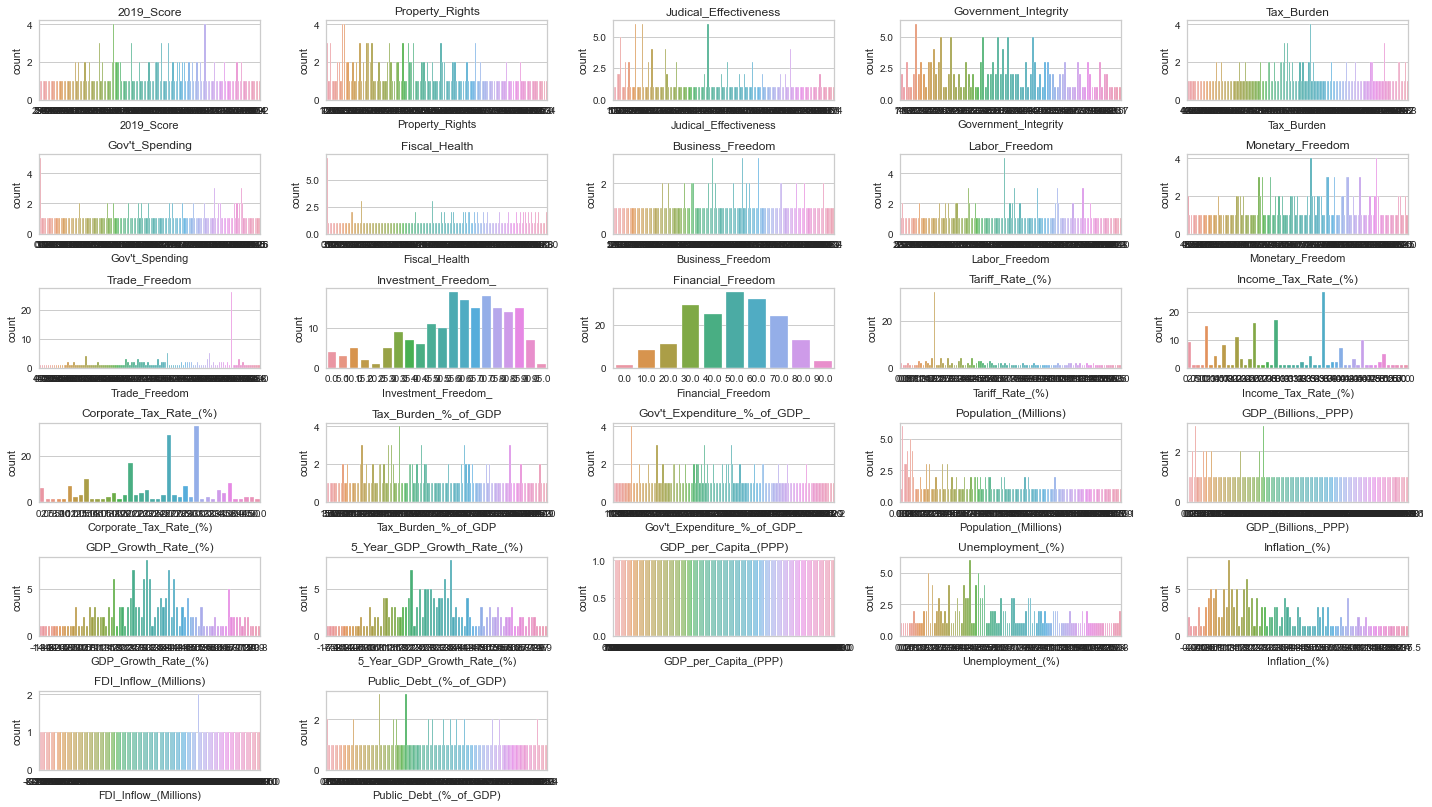

In [347]:
#figure
plt.figure(figsize=(20,50))

#picking only numerical columns
cols = data.select_dtypes(include=np.number).iloc[:,3:].columns.tolist()

for i, variable in enumerate(cols):
    plt.subplot(len(cols),5,i+1)
    sns.countplot(data[variable]) #countplot
    plt.tight_layout()
    plt.title(variable)
    
    

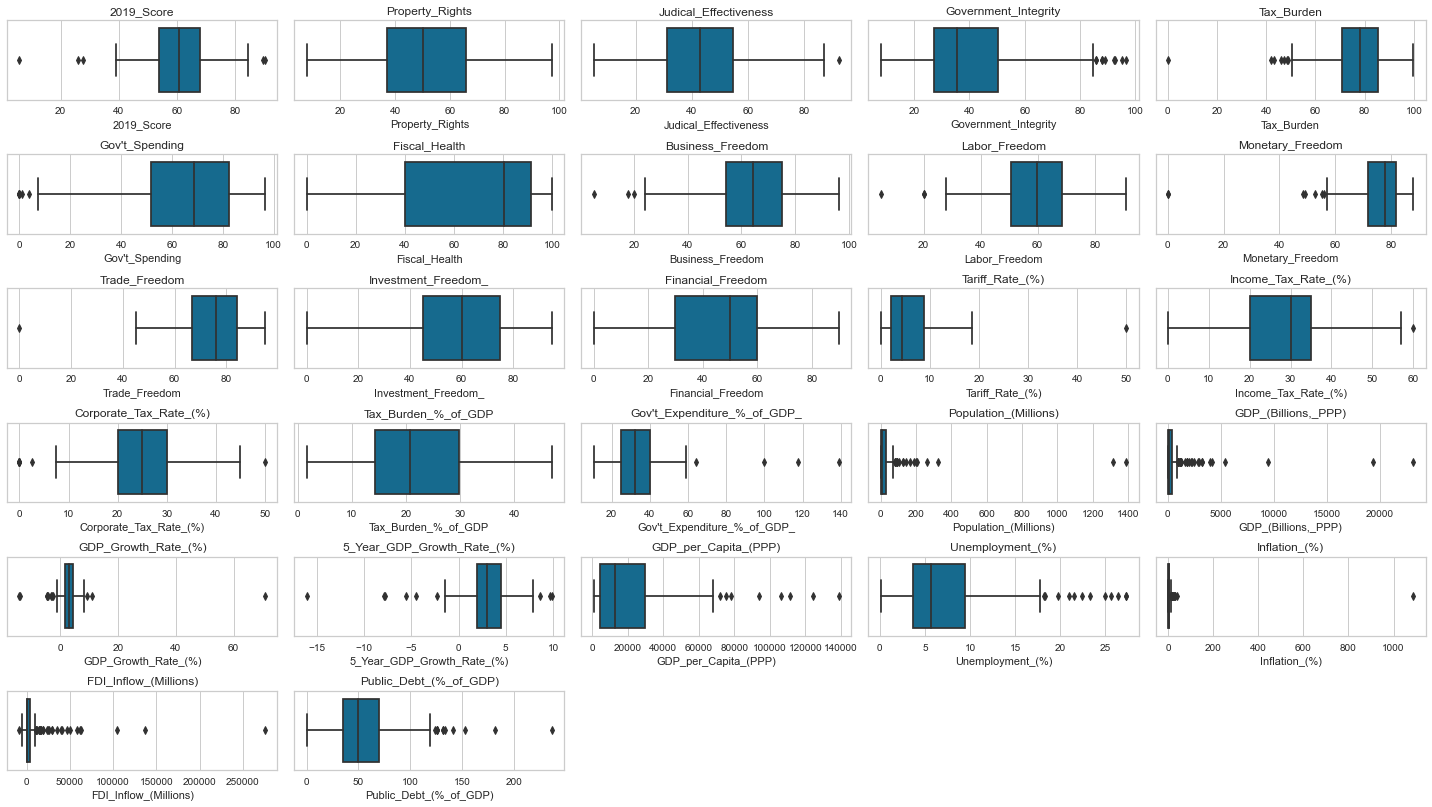

In [348]:
plt.figure(figsize=(20,50)) #figure

cols = data.select_dtypes(include=np.number).iloc[:,3:].columns.tolist()

for i, variable in enumerate(cols):
    plt.subplot(len(cols),5,i+1)
    sns.boxplot(data[variable], whis=1.5) #boxplot
    plt.tight_layout()
    plt.title(variable)
    


- There are many outliers.
- Would it affect clustering?
- In the 2019 score, there are countries with > 90 high on economic freedom
- There are countries with Inflation>100%
- 

In [349]:
data[data['Inflation_(%)']>100]

CountryID Country_Name    WEBNAME    Region  World_Rank  Region_Rank  \
181        179    Venezuela  Venezuela  Americas       179.0         32.0   

     2019_Score  Property_Rights  Judical_Effectiveness  Government_Integrity  \
181        25.9              7.6                   13.1                   7.9   

     ...    Country  Population_(Millions)  GDP_(Billions,_PPP)  \
181  ...  Venezuela                   31.4                380.7   

     GDP_Growth_Rate_(%)  5_Year_GDP_Growth_Rate_(%)  GDP_per_Capita_(PPP)  \
181                -14.0                        -7.8               12114.0   

     Unemployment_(%)  Inflation_(%)  FDI_Inflow_(Millions)  \
181               7.7         1087.5                  -68.0   

     Public_Debt_(%_of_GDP)  
181                    34.9  

[1 rows x 34 columns]

- Venezuela has very high inflation rate %

In [350]:
data[data['Public_Debt_(%_of_GDP)']>100]

CountryID        Country_Name        WEBNAME  \
12          13            Barbados       Barbados   
14          15             Belgium        Belgium   
17          18              Bhutan         Bhutan   
30          30          Cabo Verde      CaboVerde   
38          38  Congo, Republic of  RepublicCongo   
50          50               Egypt          Egypt   
53          53             Eritrea        Eritrea   
61          60              Gambia         Gambia   
65          64              Greece         Greece   
81          80               Italy          Italy   
82          81             Jamaica        Jamaica   
83          82               Japan          Japan   
95          93             Lebanon        Lebanon   
118        116          Mozambique     Mozambique   
135        133            Portugal       Portugal   
149        147           Singapore      Singapore   
157        154               Sudan          Sudan   
177        175       United States   UnitedStates   
183        181               Yemen          Yemen   

                           Region  World_Rank  Region_Rank  2019_Score  \
12                       Americas        67.0         13.0        64.7   
14                         Europe        48.0         25.0        67.3   
17                   Asia-Pacific        74.0         16.0        62.9   
30             Sub-Saharan Africa        73.0          4.0        63.1   
38             Sub-Saharan Africa       176.0         46.0        39.7   
50   Middle East and North Africa       144.0         11.0        52.5   
53             Sub-Saharan Africa       177.0         47.0        38.9   
61             Sub-Saharan Africa       146.0         30.0        52.4   
65                         Europe       106.0         43.0        57.7   
81                         Europe        80.0         36.0        62.2   
82                       Americas        39.0          5.0        68.6   
83                   Asia-Pacific        30.0          8.0        72.1   
95   Middle East and North Africa       154.0         12.0        51.1   
118            Sub-Saharan Africa       163.0         40.0        48.6   
135                        Europe        62.0         30.0        65.3   
149                  Asia-Pacific         2.0          2.0        89.4   
157            Sub-Saharan Africa       166.0         41.0        47.7   
177                      Americas        12.0          2.0        76.8   
183  Middle East and North Africa         NaN          NaN         NaN   

     Property_Rights  Judical_Effectiveness  Government_Integrity  ...  \
12              52.9                   59.9                  53.8  ...   
14              81.3                   61.6                  72.5  ...   
17              62.5                   55.4                  54.5  ...   
30              44.1                   49.0                  43.7  ...   
38              33.2                   29.6                  25.3  ...   
50              37.0                   48.3                  29.2  ...   
53              35.5                   18.1                  19.7  ...   
61              39.9                   42.5                  41.2  ...   
65              52.4                   49.5                  37.7  ...   
81              71.7                   49.8                  43.7  ...   
82              60.7                   49.2                  45.0  ...   
83              84.1                   68.5                  78.0  ...   
95              39.5                   26.6                  18.2  ...   
118             33.9                   35.2                  28.1  ...   
135             71.5                   64.3                  59.5  ...   
149             97.4                   92.4                  95.1  ...   
157             27.5                   22.2                  26.2  ...   
177             79.3                   78.6                  77.4  ...   
183             19.6                   22.2              

In [351]:
data[data['GDP_Growth_Rate_(%)']<0]

CountryID         Country_Name           WEBNAME  \
32          32                 Chad              Chad   
38          38   Congo, Republic of     RepublicCongo   
47          47             Dominica          Dominica   
52          52    Equatorial Guinea  EquatorialGuinea   
78          77                 Iraq              Iraq   
91          89               Kuwait            Kuwait   
119        117              Namibia           Namibia   
127        125                 Oman              Oman   
144        142         Saudi Arabia       SaudiArabia   
166        164          Timor-Leste        TimorLeste   
169        167  Trinidad and Tobago    TrinidadTobago   
181        179            Venezuela         Venezuela   
183        181                Yemen             Yemen   

                           Region  World_Rank  Region_Rank  2019_Score  \
32             Sub-Saharan Africa       159.0         36.0        49.9   
38             Sub-Saharan Africa       176.0         46.0        39.7   
47                       Americas        72.0         14.0        63.6   
52             Sub-Saharan Africa       174.0         44.0        41.0   
78   Middle East and North Africa         NaN          NaN         NaN   
91   Middle East and North Africa        90.0          8.0        60.8   
119            Sub-Saharan Africa        99.0         10.0        58.7   
127  Middle East and North Africa        88.0          7.0        61.0   
144  Middle East and North Africa        91.0          9.0        60.7   
166                  Asia-Pacific       172.0         42.0        44.2   
169                      Americas       112.0         22.0        57.0   
181                      Americas       179.0         32.0        25.9   
183  Middle East and North Africa         NaN          NaN         NaN   

     Property_Rights  Judical_Effectiveness  Government_Integrity  ...  \
32              26.7                   24.6                  23.2  ...   
38              33.2                   29.6                  25.3  ...   
47              49.2                   63.8                  54.5  ...   
52              29.7                   18.1                  15.8  ...   
78              37.0                   12.3                  20.3  ...   
91              52.9                   43.3                  35.3  ...   
119             55.9                   54.7                  49.8  ...   
127             58.1                   51.6                  53.8  ...   
144             55.0                   62.7                  49.8  ...   
166             29.7                   13.1                  32.1  ...   
169             52.3                   40.6                  32.9  ...   
181              7.6                   13.1                   7.9  ...   
183             19.6                   22.2                  20.3  ...   

                 Country  Population_(Millions)  GDP_(Billions,_PPP)  \
32                  Chad                   12.2                 28.6   
38    Congo, Republic of                    4.3                 28.9   
47              Dominica                    0.1                  0.8   
52     Equatorial Guinea                    0.8                 30.4   
78                  Iraq                   38.9                658.8   
91                Kuwait                    4.4                291.5   
119              Namibia                    2.3                 26.5   
127                 Oman                    4.1                186.6   
144         Saudi Arabia                   32.4               1773.6   
166          Timor-Leste                    1.2                  6.8   
169  Trinidad and Tobago                    1.4                 43.0   
181            Venezuela                   31.4                380.7   
183                Yemen                   30.0                 38.6   

     GDP_Growth_Rate_(%)  5_Year_GDP_Growth_Rate_(%)  GDP_per_Capita_(PPP)  \
32                  -3.1                     

In [352]:
data[data['5_Year_GDP_Growth_Rate_(%)']<0]

CountryID              Country_Name                 WEBNAME  \
9           10                   Bahamas                 Bahamas   
13          14                   Belarus                 Belarus   
21          22                    Brazil                  Brazil   
22         186         Brunei Darussalam                 Brunei    
31          31  Central African Republic  CentralAfricanRepublic   
52          52         Equatorial Guinea        EquatorialGuinea   
65          64                    Greece                  Greece   
91          89                    Kuwait                  Kuwait   
98          96                     Libya                   Libya   
102        100                     Macau                   Macau   
158        155                  Suriname                Suriname   
169        167       Trinidad and Tobago          TrinidadTobago   
174        172                   Ukraine                 Ukraine   
181        179                 Venezuela               Venezuela   
183        181                     Yemen                   Yemen   

                           Region  World_Rank  Region_Rank  2019_Score  \
9                        Americas        76.0         15.0        62.9   
13                         Europe       104.0         42.0        57.9   
21                       Americas       150.0         27.0        51.9   
22                   Asia-Pacific        63.0         14.0        65.1   
31             Sub-Saharan Africa       161.0         38.0        49.1   
52             Sub-Saharan Africa       174.0         44.0        41.0   
65                         Europe       106.0         43.0        57.7   
91   Middle East and North Africa        90.0          8.0        60.8   
98   Middle East and North Africa         NaN          NaN         NaN   
102                  Asia-Pacific        34.0          9.0        71.0   
158                      Americas       165.0         28.0        48.1   
169                      Americas       112.0         22.0        57.0   
174                        Europe       147.0         44.0        52.3   
181                      Americas       179.0         32.0        25.9   
183  Middle East and North Africa         NaN          NaN         NaN   

     Property_Rights  Judical_Effectiveness  Government_Integrity  ...  \
9               42.2                   46.9                  43.7  ...   
13              55.2                   51.7                  37.7  ...   
21              57.3                   51.7                  28.1  ...   
22              64.0                   56.0                  43.7  ...   
31              19.6                   29.6                  23.2  ...   
52              29.7                   18.1                  15.8  ...   
65              52.4                   49.5                  37.7  ...   
91              52.9                   43.3                  35.3  ...   
98               7.6                   24.4                  15.8  ...   
102             60.0                   60.0                  33.2  ...   
158             49.1                   22.2                  35.5  ...   
169             52.3                   40.6                  32.9  ...   
174             43.9                   31.5                  29.6  ...   
181              7.6                   13.1                   7.9  ...   
183             19.6                   22.2                  20.3  ...   

                      Country  Population_(Millions)  GDP_(Billions,_PPP)  \
9                     Bahamas                    0.4                 11.6   
13                    Belarus                    9.5                178.9   
21                     Brazil                  207.7               3240.3   
22          Brunei Darussalam                    0.4                 33.5   
31   Central African Republic                    5.0                  3.4   
52          Equatorial Guinea                    0.8                 30.4   
65     

- These countries have <0 GDP growth rate

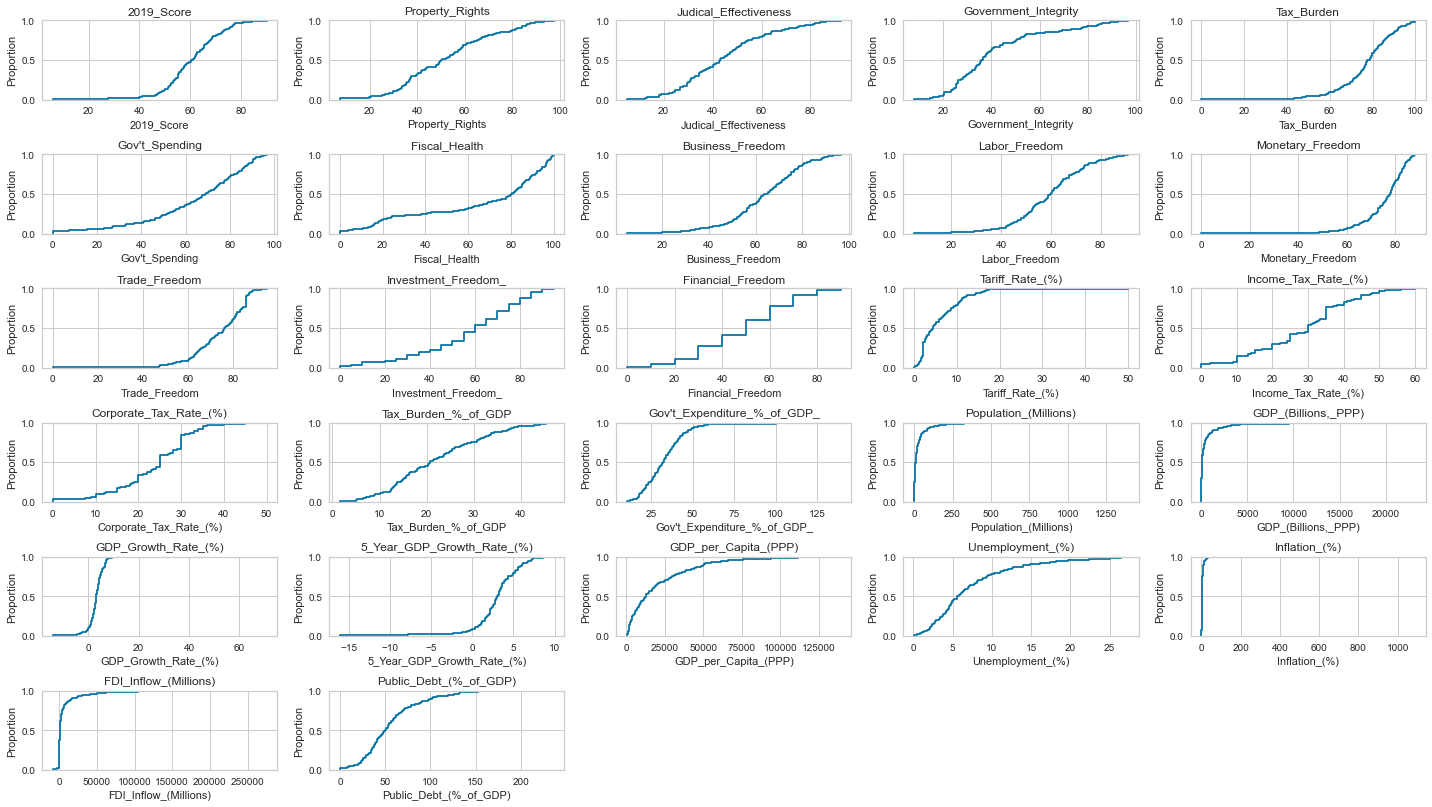

In [353]:
#cdf plot
plt.figure(figsize=(20,50))

cols = data.select_dtypes(include=np.number).iloc[:,3:].columns.tolist() #only from columns 1 to last

for i, variable in enumerate(cols):
    plt.subplot(len(cols),5,i+1)
    sns.ecdfplot(data[variable]) #ecdf plot
    plt.tight_layout()
    plt.title(variable)
    


- 50% of the countries have scores less than 60.
- About 50% of the countries have tax burden scores less than 80.
- About 90% of the countries have population less than approximately 200 million

### Data preparation for visualization

- We can drop WEBNAME and Country as these are basically duplicates of Country_Name. 

In [354]:
# dropping webname and country as they are basically a duplicate of country name column
data = data.drop(['WEBNAME', 'Country'], axis=1)

In [355]:
#preparing data for heatmap (removing the first 2 columns)- Country ID, Name 
data_heatmap = data.iloc[:,2:]
data_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Region                       186 non-null    object 
 1   World_Rank                   180 non-null    float64
 2   Region_Rank                  180 non-null    float64
 3   2019_Score                   180 non-null    float64
 4   Property_Rights              185 non-null    float64
 5   Judical_Effectiveness        185 non-null    float64
 6   Government_Integrity         185 non-null    float64
 7   Tax_Burden                   180 non-null    float64
 8   Gov't_Spending               183 non-null    float64
 9   Fiscal_Health                183 non-null    float64
 10  Business_Freedom             185 non-null    float64
 11  Labor_Freedom                184 non-null    float64
 12  Monetary_Freedom             184 non-null    float64
 13  Trade_Freedom       

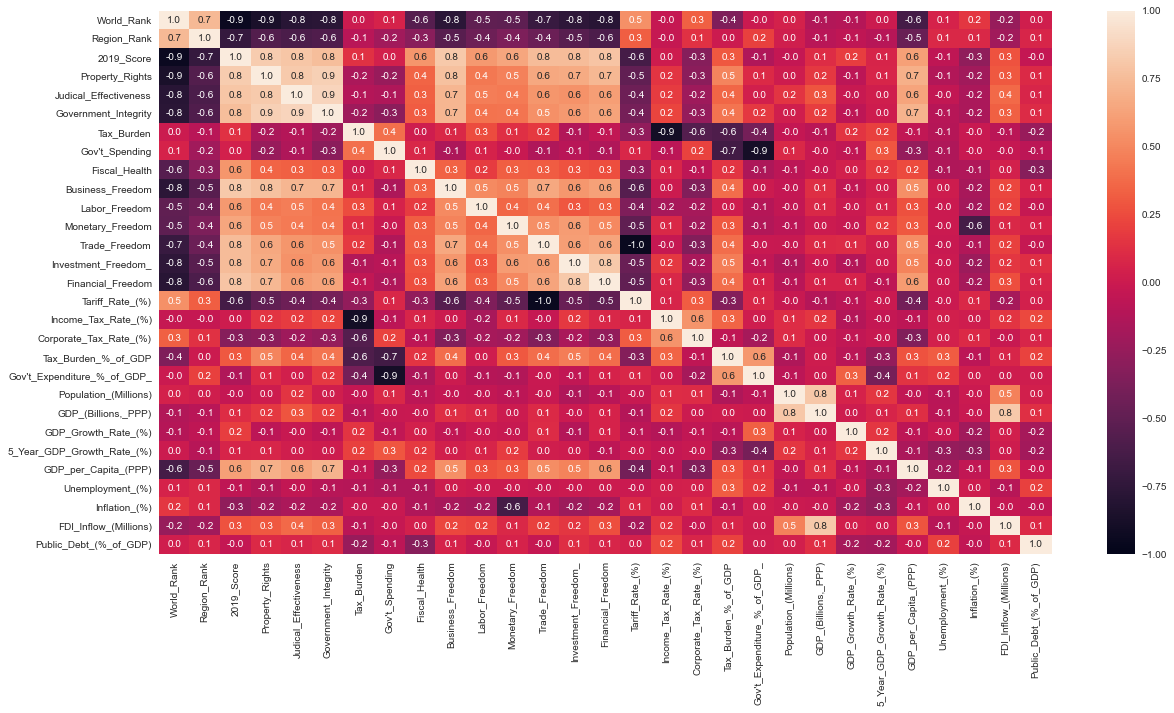

In [356]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data_heatmap.corr(),annot=True,fmt=".1f",vmin=-1, vmax=1) 
plt.show()

#### Negative correlation
- World Rank is negatively correlated with 2019 Score, Property_Rights, Judicial Effectiveness, Government Integrity, 
Business Freedom, Investment Freedom, Financial Freedom
- Govt spending is highly negatively correlated with Govt Expenditure % of GDP
- Tax Burden is highly negatively correlated with Income Tax Rate %
- Trade Freedom is highly negatively correlated with Tariff Rate %

####  Positive correlation
- World Rank is positively correlated with Region Rank
- 2019 Score is highly positively correlated with Property Rights, Judicial Effectiveness, Govt Integrity, Business Freedom, Trade Freedom, Investment Freedom, Financial Freedom
- Property Rights is highly correlated with 2019 Score, Judicial effectiveness, Govt integrity, Business Freedom, Trade Freedom, Investment Freedom, Financial Freedom
- Judicial Effectiveness is highly correlated with 2019 Score, Property rights, Govt integrity, Business Freedom
- Govt integrity is positively correlated with 2019 score, property rights, judicial effectiveness, govt integrity, business freedom
- Trade freedom is positively correlated with investment freedom
- Population (millions) is positively correlated with GDP, Billion, PPP
- GDP Billions PPP is positively correlated with FDI inflow millions
- GDP per capita PPP is positively correlated with property rights and govt integrity


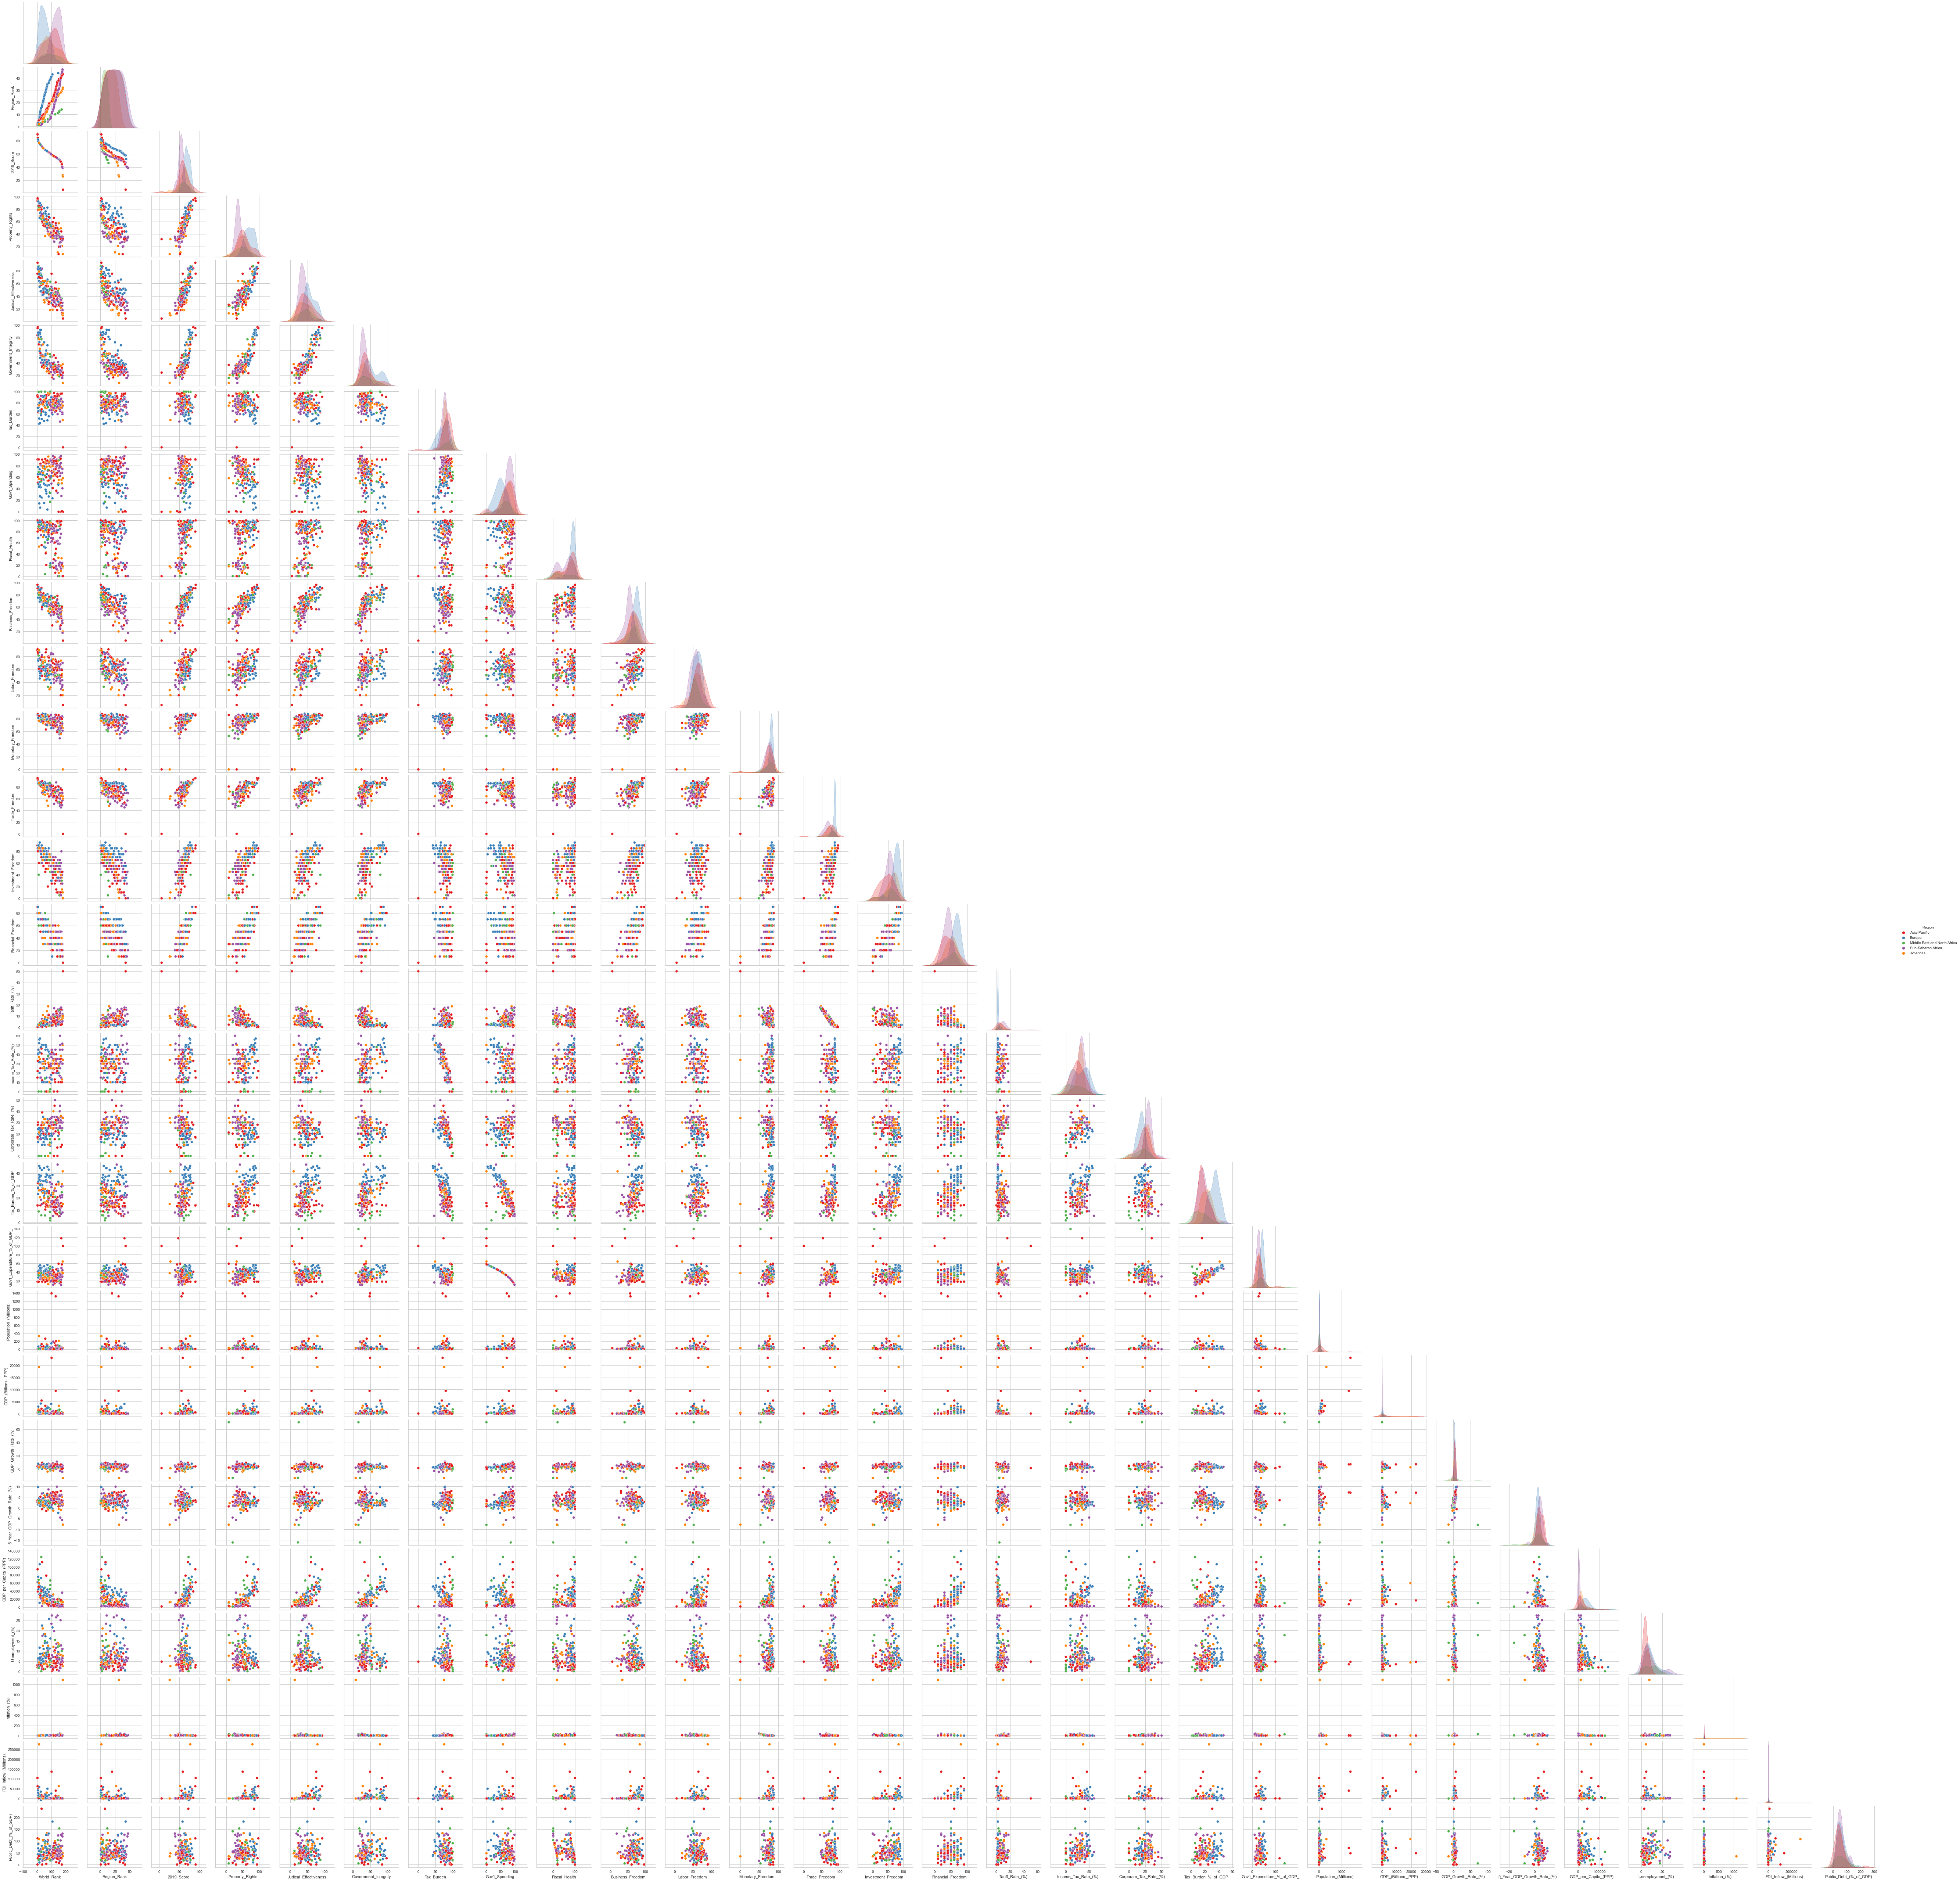

In [357]:
#pairplot
sns.pairplot(data_heatmap, diag_kind='kde',corner=True,palette='Set1', hue = 'Region')
plt.show()

- Many variables are highly positively correlated and some others have high negative correlation. 


In [358]:
# checking columns with the text '_Freedom'
freedom_cols = [col for col in data.columns if '_Freedom' in col]
freedom_cols

['Business_Freedom',
 'Labor_Freedom',
 'Monetary_Freedom',
 'Trade_Freedom',
 'Investment_Freedom_',
 'Financial_Freedom']

## Outlier treatment

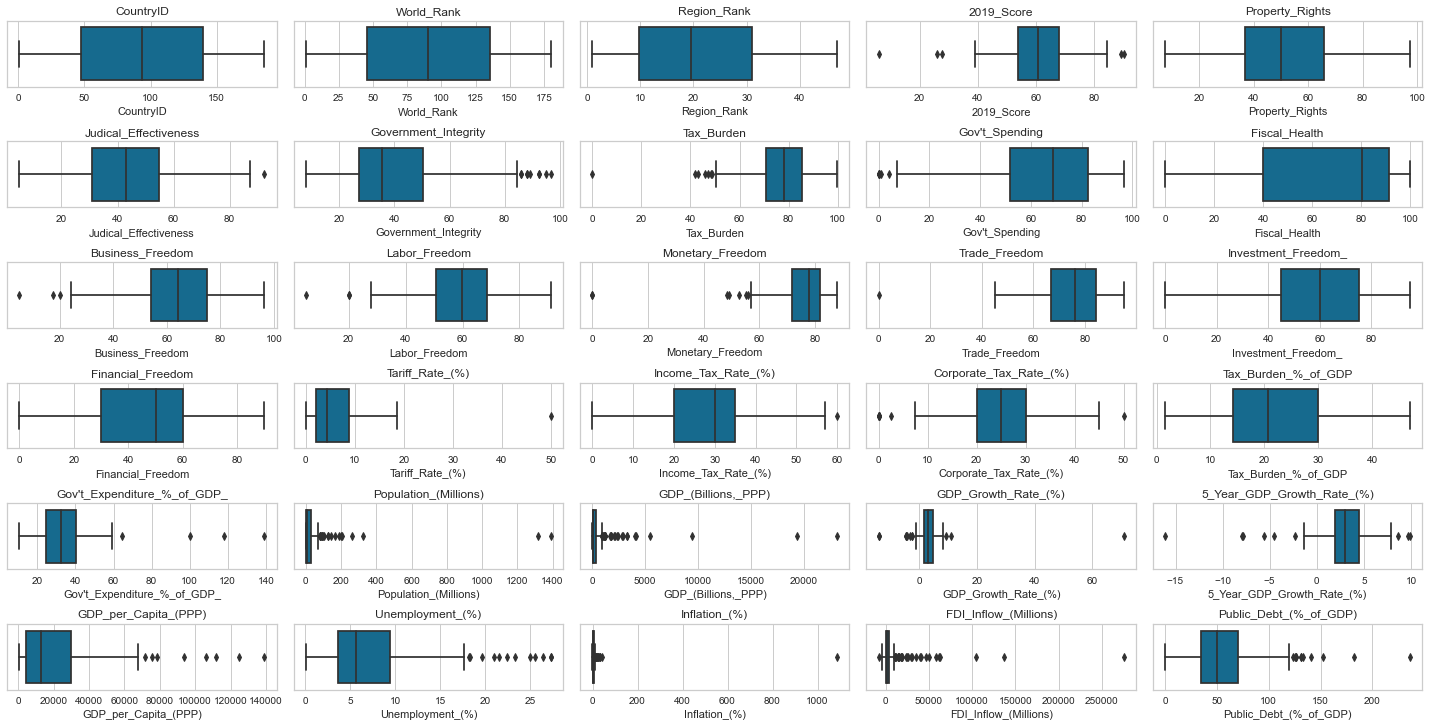

In [359]:
#box plot for all the numerical columns - cols
plt.figure(figsize=(20,50))

cols = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(cols):
    plt.subplot(len(cols),5,i+1)
    sns.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
    

- There are many outliers 
- For now, we leave the outliers without treating. 

## Missing value treatment

In [360]:
# missing value treatment for all the columns with missing values median imputed
imputed_columns = []

for i in data.columns:
    if data[i].isnull().sum()>0:
        imputed_columns.append(i)

imputed_columns

['World_Rank',
 'Region_Rank',
 '2019_Score',
 'Property_Rights',
 'Judical_Effectiveness',
 'Government_Integrity',
 'Tax_Burden',
 "Gov't_Spending",
 'Fiscal_Health',
 'Business_Freedom',
 'Labor_Freedom',
 'Monetary_Freedom',
 'Trade_Freedom',
 'Investment_Freedom_',
 'Financial_Freedom',
 'Tariff_Rate_(%)',
 'Income_Tax_Rate_(%)',
 'Corporate_Tax_Rate_(%)',
 'Tax_Burden_%_of_GDP',
 "Gov't_Expenditure_%_of_GDP_",
 'GDP_(Billions,_PPP)',
 'GDP_Growth_Rate_(%)',
 '5_Year_GDP_Growth_Rate_(%)',
 'GDP_per_Capita_(PPP)',
 'Unemployment_(%)',
 'Inflation_(%)',
 'FDI_Inflow_(Millions)',
 'Public_Debt_(%_of_GDP)']

In [361]:
#% missing values in each column.
data.isnull().sum()/186 *100

CountryID                      0.000000
Country_Name                   0.000000
Region                         0.000000
World_Rank                     3.225806
Region_Rank                    3.225806
2019_Score                     3.225806
Property_Rights                0.537634
Judical_Effectiveness          0.537634
Government_Integrity           0.537634
Tax_Burden                     3.225806
Gov't_Spending                 1.612903
Fiscal_Health                  1.612903
Business_Freedom               0.537634
Labor_Freedom                  1.075269
Monetary_Freedom               1.075269
Trade_Freedom                  2.150538
Investment_Freedom_            1.075269
Financial_Freedom              2.688172
Tariff_Rate_(%)                2.150538
Income_Tax_Rate_(%)            1.612903
Corporate_Tax_Rate_(%)         1.612903
Tax_Burden_%_of_GDP            3.763441
Gov't_Expenditure_%_of_GDP_    2.150538
Population_(Millions)          0.000000
GDP_(Billions,_PPP)            0.537634


- There are less than 3% missing values 

In [362]:
#SimpleImputer with median

simImp=SimpleImputer(strategy='median') #median

#Fit and transform the train data
data[imputed_columns]=simImp.fit_transform(data[imputed_columns])  #all columns with missing values treated with median values

#Transform the test data i.e. replace missing values with the median calculated using training data
data[imputed_columns]=simImp.transform(data[imputed_columns])

In [363]:
#checking 
data.isnull().sum()

CountryID                      0
Country_Name                   0
Region                         0
World_Rank                     0
Region_Rank                    0
2019_Score                     0
Property_Rights                0
Judical_Effectiveness          0
Government_Integrity           0
Tax_Burden                     0
Gov't_Spending                 0
Fiscal_Health                  0
Business_Freedom               0
Labor_Freedom                  0
Monetary_Freedom               0
Trade_Freedom                  0
Investment_Freedom_            0
Financial_Freedom              0
Tariff_Rate_(%)                0
Income_Tax_Rate_(%)            0
Corporate_Tax_Rate_(%)         0
Tax_Burden_%_of_GDP            0
Gov't_Expenditure_%_of_GDP_    0
Population_(Millions)          0
GDP_(Billions,_PPP)            0
GDP_Growth_Rate_(%)            0
5_Year_GDP_Growth_Rate_(%)     0
GDP_per_Capita_(PPP)           0
Unemployment_(%)               0
Inflation_(%)                  0
FDI_Inflow

- All missing values are treated

## Data preparation for clustering

- For clustering, we need to use only those columns that are used to calculate economic freedom. 

In [364]:
# data preparationf for clustering. Selecting only necessary columns (here, only columns for economic freedom 6-18)
dataClus = data.iloc[:,6:18]
dataClus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Property_Rights        186 non-null    float64
 1   Judical_Effectiveness  186 non-null    float64
 2   Government_Integrity   186 non-null    float64
 3   Tax_Burden             186 non-null    float64
 4   Gov't_Spending         186 non-null    float64
 5   Fiscal_Health          186 non-null    float64
 6   Business_Freedom       186 non-null    float64
 7   Labor_Freedom          186 non-null    float64
 8   Monetary_Freedom       186 non-null    float64
 9   Trade_Freedom          186 non-null    float64
 10  Investment_Freedom_    186 non-null    float64
 11  Financial_Freedom      186 non-null    float64
dtypes: float64(12)
memory usage: 17.6 KB


- We have 12 components. We need to do principal component analysis. 
- Before that, we can do standardization

## Standardization
- We will use Standard Scaler 

In [365]:
stdscaler = StandardScaler() #standard scaler
scaled_data_eco = pd.DataFrame(stdscaler.fit_transform(dataClus), columns= dataClus.columns) #treating on the dataClus
scaled_data_eco.head() #first few rows

Property_Rights  Judical_Effectiveness  Government_Integrity  Tax_Burden  \
0        -1.677422              -0.849008             -0.824636    1.115910   
1         0.127383              -0.793476             -0.052722    0.699186   
2        -1.062147              -0.482499             -0.636736   -0.064807   
3        -0.841674              -1.015603             -1.063319    0.513976   
4        -0.231527              -0.021586             -0.403130   -0.612721   

   Gov't_Spending  Fiscal_Health  Business_Freedom  Labor_Freedom  \
0        0.699408       1.050845         -0.911165       0.066904   
1        0.420030       0.456673          0.367928      -0.473842   
2       -0.680022      -1.510131         -0.122073      -0.670477   
3        0.716869      -0.255062         -0.497528      -0.045459   
4       -0.645100      -1.055765         -0.452982      -0.881157   

   Monetary_Freedom  Trade_Freedom  Investment_Freedom_  Financial_Freedom  
0          0.143379      -0.686064            -2.111766          -2.025088  
1          0.574384       1.115771             0.567860           1.105103  
2         -0.018248      -0.570350            -1.218558          -0.981691  
3         -1.769206      -1.082799            -1.218558          -0.459992  
4         -1.338201      -0.355452            -0.102047           0.583405

- Dataset is scaled. 

## PCA

In [366]:
scaled_PCA_eco = scaled_data_eco.copy() #copying a new database

In [367]:
pca = PCA() #PCA 
pca.fit(scaled_PCA_eco) #applying PCA on scaled_PCA_eco

PCA()

In [368]:
pca.explained_variance_ratio_ # checking the variance ratio

array([0.48682151, 0.13737563, 0.07807982, 0.07368219, 0.05691884,
       0.04658728, 0.03707776, 0.02644938, 0.02165507, 0.01535595,
       0.01189929, 0.00809728])

In [369]:
print(len(scaled_PCA_eco.columns)) #number of columns in the PCA data set.
scaled_PCA_eco.head()

12


Property_Rights  Judical_Effectiveness  Government_Integrity  Tax_Burden  \
0        -1.677422              -0.849008             -0.824636    1.115910   
1         0.127383              -0.793476             -0.052722    0.699186   
2        -1.062147              -0.482499             -0.636736   -0.064807   
3        -0.841674              -1.015603             -1.063319    0.513976   
4        -0.231527              -0.021586             -0.403130   -0.612721   

   Gov't_Spending  Fiscal_Health  Business_Freedom  Labor_Freedom  \
0        0.699408       1.050845         -0.911165       0.066904   
1        0.420030       0.456673          0.367928      -0.473842   
2       -0.680022      -1.510131         -0.122073      -0.670477   
3        0.716869      -0.255062         -0.497528      -0.045459   
4       -0.645100      -1.055765         -0.452982      -0.881157   

   Monetary_Freedom  Trade_Freedom  Investment_Freedom_  Financial_Freedom  
0          0.143379      -0.686064            -2.111766          -2.025088  
1          0.574384       1.115771             0.567860           1.105103  
2         -0.018248      -0.570350            -1.218558          -0.981691  
3         -1.769206      -1.082799            -1.218558          -0.459992  
4         -1.338201      -0.355452            -0.102047           0.583405

Text(0, 0.5, 'Cumulative Explained Variance')

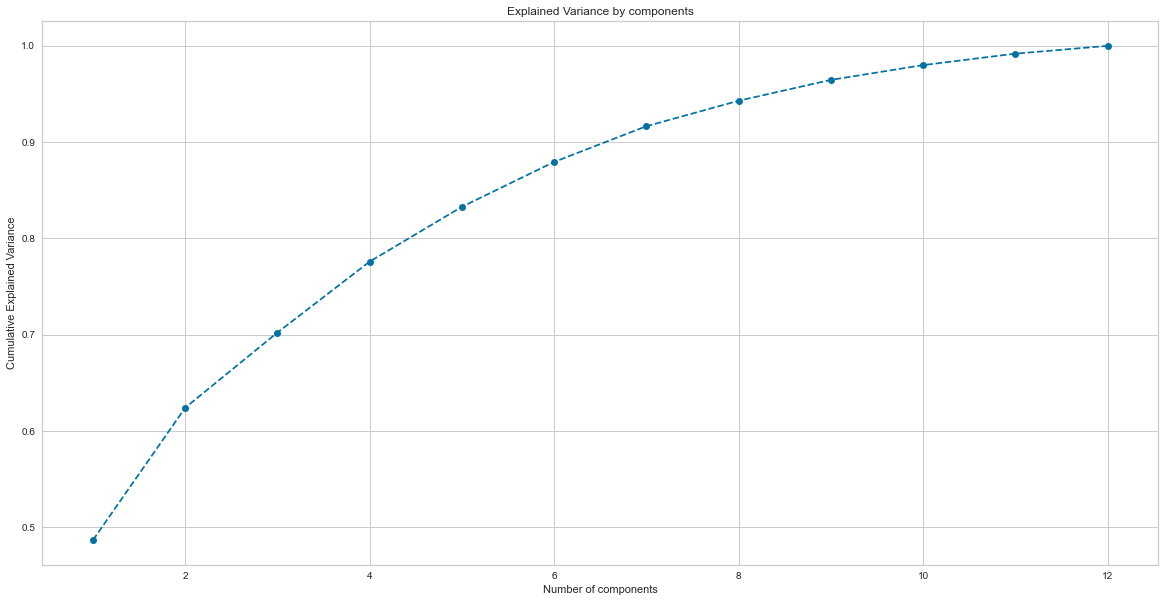

In [370]:
#plot of Explained variance by components
plt.figure(figsize=(20,10))
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle = '--') #plot 

plt.title("Explained Variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")

- There are 12 components now. We will reduce the variables such that the components can explain 95% variance. 

In [371]:
pca = PCA(0.95, svd_solver='full') #pca - 95% variance
pca.fit(scaled_PCA_eco)

PCA(n_components=0.95, svd_solver='full')

In [372]:
pca.explained_variance_ratio_ #variance explained with PCA

array([0.48682151, 0.13737563, 0.07807982, 0.07368219, 0.05691884,
       0.04658728, 0.03707776, 0.02644938, 0.02165507])

Text(0, 0.5, 'Cumulative Explained Variance')

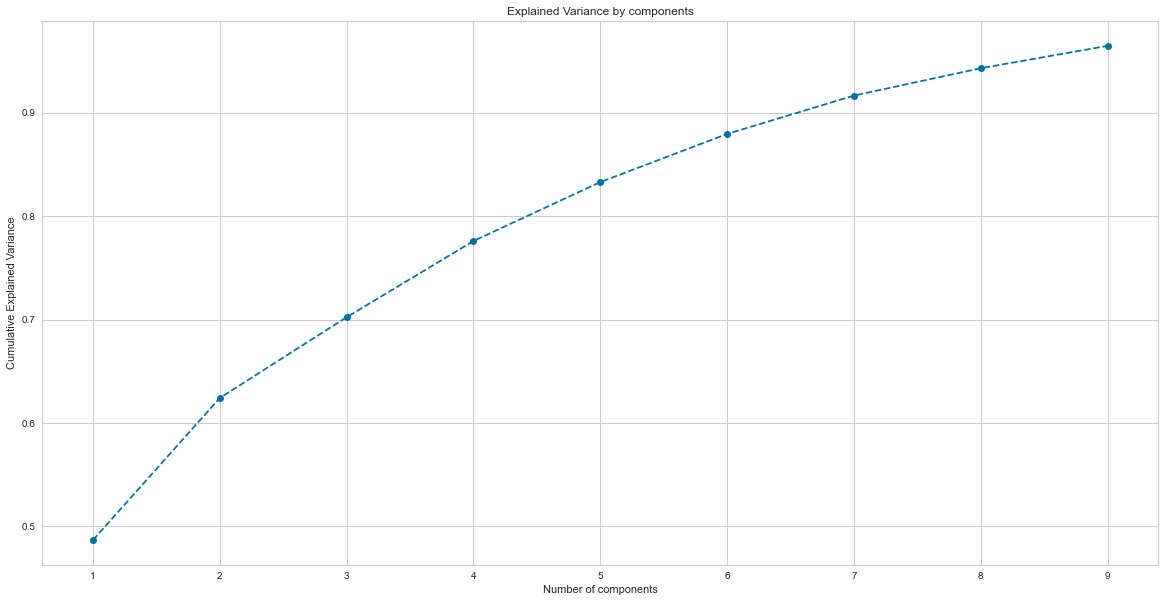

In [373]:
# plot PCA with components that can explain 95% variance
plt.figure(figsize=(20,10))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle = '--') #plot with 95% variance
plt.title("Explained Variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")

- There are 8 components now. Now we transform it to a dataset

In [374]:
#transform PCA to dataset with 8 components
scaled_PCA_eco_data = pca.transform(scaled_PCA_eco) #transforming PCA to the dataset
scaled_PCA_eco_data = pd.DataFrame(scaled_PCA_eco_data)
scaled_PCA_eco_data

0         1         2         3         4         5         6  \
0    2.965210 -1.713623 -0.246813  1.516549  1.301837 -0.568606  0.679400   
1   -0.868162 -0.949896  1.142723 -0.821866  0.419322  0.781451 -0.268452   
2    2.114641  0.594701 -0.879218 -0.802693  0.393533 -0.216477  0.916554   
3    2.725978 -0.578178 -0.615943  0.530719 -0.438980  0.631981 -0.822418   
4    1.034863  1.445366 -0.176814 -0.726474 -0.573800  0.875118 -0.507977   
..        ...       ...       ...       ...       ...       ...       ...   
181  7.211799  1.993286 -1.921209  0.885614 -0.700050  3.727189 -1.928188   
182  0.972781 -0.411159 -1.026801 -0.091251 -0.152387  0.361498  0.096526   
183  2.961301 -0.175609 -0.069831 -1.680266 -1.190973  0.530228 -0.506940   
184  1.059793  0.303484 -0.083084 -1.135639 -1.147661  0.601385  0.456994   
185  3.808164  0.707726  0.210868 -0.320552 -0.181490 -0.640159  0.866539   

            7         8  
0   -0.264986  0.281750  
1   -0.066326 -0.202460  
2   -0.082583 -0.386577  
3    0.349825 -0.228415  
4    0.191776  0.180369  
..        ...       ...  
181 -0.558090  0.050911  
182 -0.806468 -0.168501  
183 -0.437667  0.116249  
184 -0.239607 -0.962320  
185 -1.581936  0.139267  

[186 rows x 9 columns]

- There are 8 components with 186 rows

## Clustering
- Clustering analysis will be done for datasets before and after PCA. 
- Both KMeans and Hierarchical clustering will be performed and the best will be selected. 

## K Means clustering (without PCA)


In [375]:
clusters_number = range(1,12) #cluster number
mean_distortions = [] #mean distortions

for k in clusters_number: #to find the number of clusters for kmeans
    model = KMeans(n_clusters= k, random_state=1) #kmeans
    model.fit(scaled_data_eco) #dataset without PCA
    prediction_kmeans = model.predict(scaled_data_eco)
    distortion_kmeans = sum(np.min(distance.cdist(scaled_data_eco, model.cluster_centers_, 'euclidean'), axis=1))/scaled_data_eco.shape[0]
    mean_distortions.append(distortion_kmeans)
    print("Number of clusters = ", k, "\t Average distortion = ", distortion_kmeans)

Number of clusters =  1 	 Average distortion =  3.1774395114709852
Number of clusters =  2 	 Average distortion =  2.652362445551087
Number of clusters =  3 	 Average distortion =  2.4549401633131507
Number of clusters =  4 	 Average distortion =  2.37785726469538
Number of clusters =  5 	 Average distortion =  2.2583006529627623
Number of clusters =  6 	 Average distortion =  2.2164984752419623
Number of clusters =  7 	 Average distortion =  2.130223420240731
Number of clusters =  8 	 Average distortion =  2.0644508657213176
Number of clusters =  9 	 Average distortion =  2.0112948102272745
Number of clusters =  10 	 Average distortion =  1.9811410072960498
Number of clusters =  11 	 Average distortion =  1.9333824077486101


Text(0.5, 1.0, 'Elbow method- selecting the number of clusters, k- Euclidean')

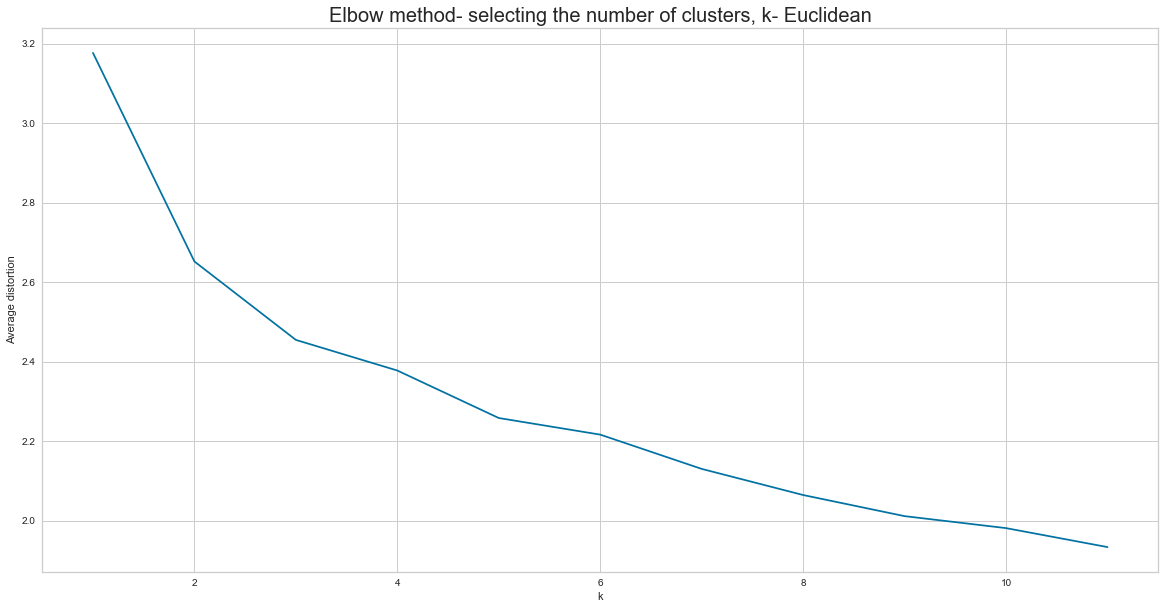

In [376]:
#plotting the figure
plt.figure(figsize=(20,10))
plt.plot(clusters_number, mean_distortions, 'bx-')
plt.xlabel('k')

plt.ylabel('Average distortion')
plt.title('Elbow method- selecting the number of clusters, k- Euclidean', fontsize=20)

- k=3 
- We can also check the Silhouette score

In [377]:
#calculating the silhouette score for kmeans

Silhouette_score = []
cluster_num = list(range(2,12))

for n_clusters in cluster_num:
    Sil_clusters = KMeans(n_clusters=n_clusters,random_state=1)
    prediction_clusters = Sil_clusters.fit_predict((scaled_data_eco))
    
    score = silhouette_score(scaled_data_eco, prediction_clusters)
    Silhouette_score.append(score)
    print("For n_clusters = {}, Silhouette score is {})".format(n_clusters, score))
    

For n_clusters = 2, Silhouette score is 0.26444719452098053)
For n_clusters = 3, Silhouette score is 0.18491163956244036)
For n_clusters = 4, Silhouette score is 0.19625444970519845)
For n_clusters = 5, Silhouette score is 0.1877644148734238)
For n_clusters = 6, Silhouette score is 0.18367552473289867)
For n_clusters = 7, Silhouette score is 0.16294165341373965)
For n_clusters = 8, Silhouette score is 0.149942851309443)
For n_clusters = 9, Silhouette score is 0.15174914496903052)
For n_clusters = 10, Silhouette score is 0.15084413814534917)
For n_clusters = 11, Silhouette score is 0.14937398755320297)


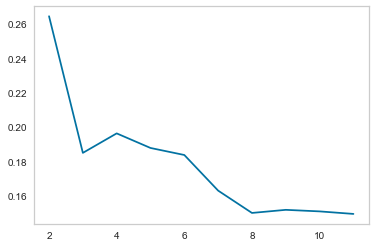

In [378]:
#plottting the silhouette score
plt.plot(cluster_num,Silhouette_score)
plt.grid()

- 2 and 4 clusters look like a good option with relatively high silhouette score. 

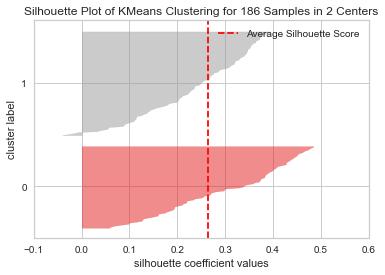

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 186 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [379]:
#silhouette score for 2 clusters

Sil_visualizer = SilhouetteVisualizer(KMeans(2, random_state = 1)) #2 clusters
Sil_visualizer.fit(scaled_data_eco)    
Sil_visualizer.show()

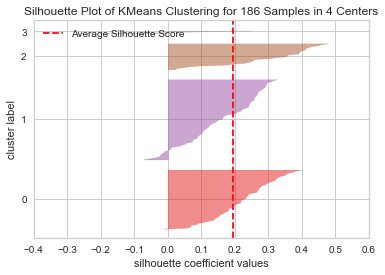

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 186 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [380]:
#silhouette score with 4 clusters
Sil_visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1)) #2 clusters
Sil_visualizer.fit(scaled_data_eco)    
Sil_visualizer.show()

- k=4 has 3 groups with good width and one with very low width

In [381]:
#kmeans with 4 clusters
kmeans = KMeans(n_clusters=4)    
kmeans_Clus_model_labels = kmeans.fit(scaled_data_eco) #final kmeans label

data['K_means_segments'] = kmeans_Clus_model_labels.labels_ # original dataset with kmeans labels

#cluster profile for kmeans 
profile_clusters = data.groupby('K_means_segments').mean()
profile_clusters['count_in_each_K_segment'] = data.groupby('K_means_segments')['2019_Score'].count().values

'''
let's display cluster profile with max and min value highlighted with light green and light blue respectively
'''
profile_clusters.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'lightblue', axis = 0)


## Kmeans clustering with dataset after PCA.
- There were 8 principal components after PCA

In [382]:
#kmeans with PCA with euclidean distance

clusters_number = range(1,8)
mean_distortions = []

for k in clusters_number:
    model = KMeans(n_clusters= k, random_state=1)
    model.fit(scaled_PCA_eco_data) #dataset after PCA
    prediction_kmeans = model.predict(scaled_PCA_eco_data)
    distortion_kmeans = sum(np.min(distance.cdist(scaled_PCA_eco_data, model.cluster_centers_, 'euclidean'), axis=1))/scaled_PCA_eco_data.shape[0]
    mean_distortions.append(distortion_kmeans)
    print("Number of clusters = ", k, "\t Average distortion = ", distortion_kmeans)

Number of clusters =  1 	 Average distortion =  3.103794597732549
Number of clusters =  2 	 Average distortion =  2.5675086947289683
Number of clusters =  3 	 Average distortion =  2.3601474850036315
Number of clusters =  4 	 Average distortion =  2.2848615799679557
Number of clusters =  5 	 Average distortion =  2.164207855123082
Number of clusters =  6 	 Average distortion =  2.0918926770379054
Number of clusters =  7 	 Average distortion =  2.042743848117103


Text(0.5, 1.0, 'Elbow method- selecting the number of clusters, k- Euclidean')

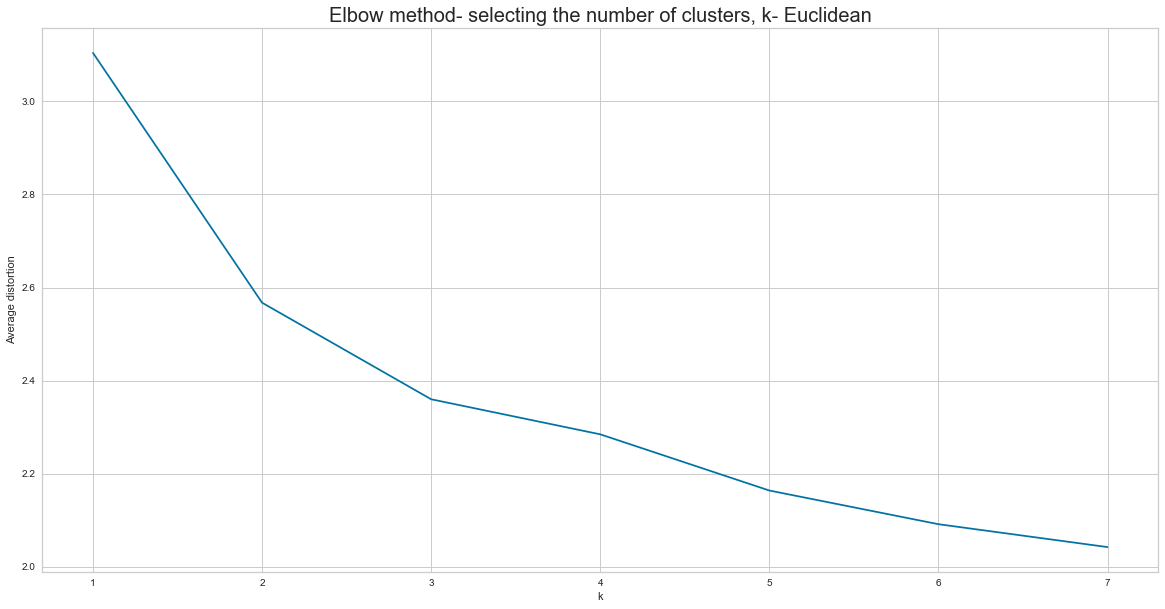

In [383]:
#plotting - kmeans clustering after PCA
plt.figure(figsize=(20,10))
plt.plot(clusters_number, mean_distortions, 'bx-')
plt.xlabel('k')

plt.ylabel('Average distortion')
plt.title('Elbow method- selecting the number of clusters, k- Euclidean', fontsize=20)

For n_clusters = 2, Silhouette score is 0.2753466436641493)
For n_clusters = 3, Silhouette score is 0.19781239939796524)
For n_clusters = 4, Silhouette score is 0.20901255122594933)
For n_clusters = 5, Silhouette score is 0.19793457591456293)
For n_clusters = 6, Silhouette score is 0.1538219959664751)
For n_clusters = 7, Silhouette score is 0.17355320979968822)


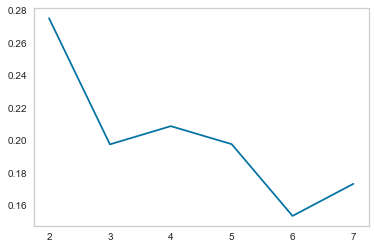

In [384]:
#silhouette score of kmeans clustering with PCA

Silhouette_score = []
cluster_num = list(range(2,8))

for n_clusters in cluster_num:
    sil_clusters = KMeans(n_clusters=n_clusters,random_state=1)
    prediction_clusters = sil_clusters.fit_predict((scaled_PCA_eco_data))
    
    score = silhouette_score(scaled_PCA_eco_data, prediction_clusters)
    Silhouette_score.append(score)
    print("For n_clusters = {}, Silhouette score is {})".format(n_clusters, score))
    
plt.plot(cluster_num,Silhouette_score)
plt.grid()

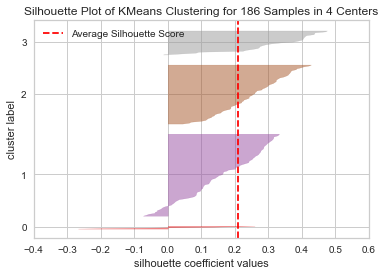

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 186 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [385]:
#pca with 4 kmeans cluster
Sil_visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1)) #4 clusters
Sil_visualizer.fit(scaled_PCA_eco_data)    
Sil_visualizer.show()

In [386]:
# fitting KMeans    4 clusters
kmeans = KMeans(n_clusters=4, random_state=1) #final kmeans with 4 clusters    
kmeans_Clus_PCA_model_labels = kmeans.fit(scaled_PCA_eco_data) #data after PCA

data['K_means_PCA_segments'] = kmeans_Clus_PCA_model_labels.labels_
scaled_PCA_eco_data['K_means_PCA_segments'] = kmeans_Clus_PCA_model_labels.labels_

#cluster profiling for pca kmeans
profile_clusters = data.groupby('K_means_PCA_segments').mean()
profile_clusters['count_in_each_K_segment'] = data.groupby('K_means_PCA_segments')['2019_Score'].count().values

'''
let's display cluster profile with max and min value highlighted with light green and light blue respectively
'''
profile_clusters.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'lightblue', axis = 0)


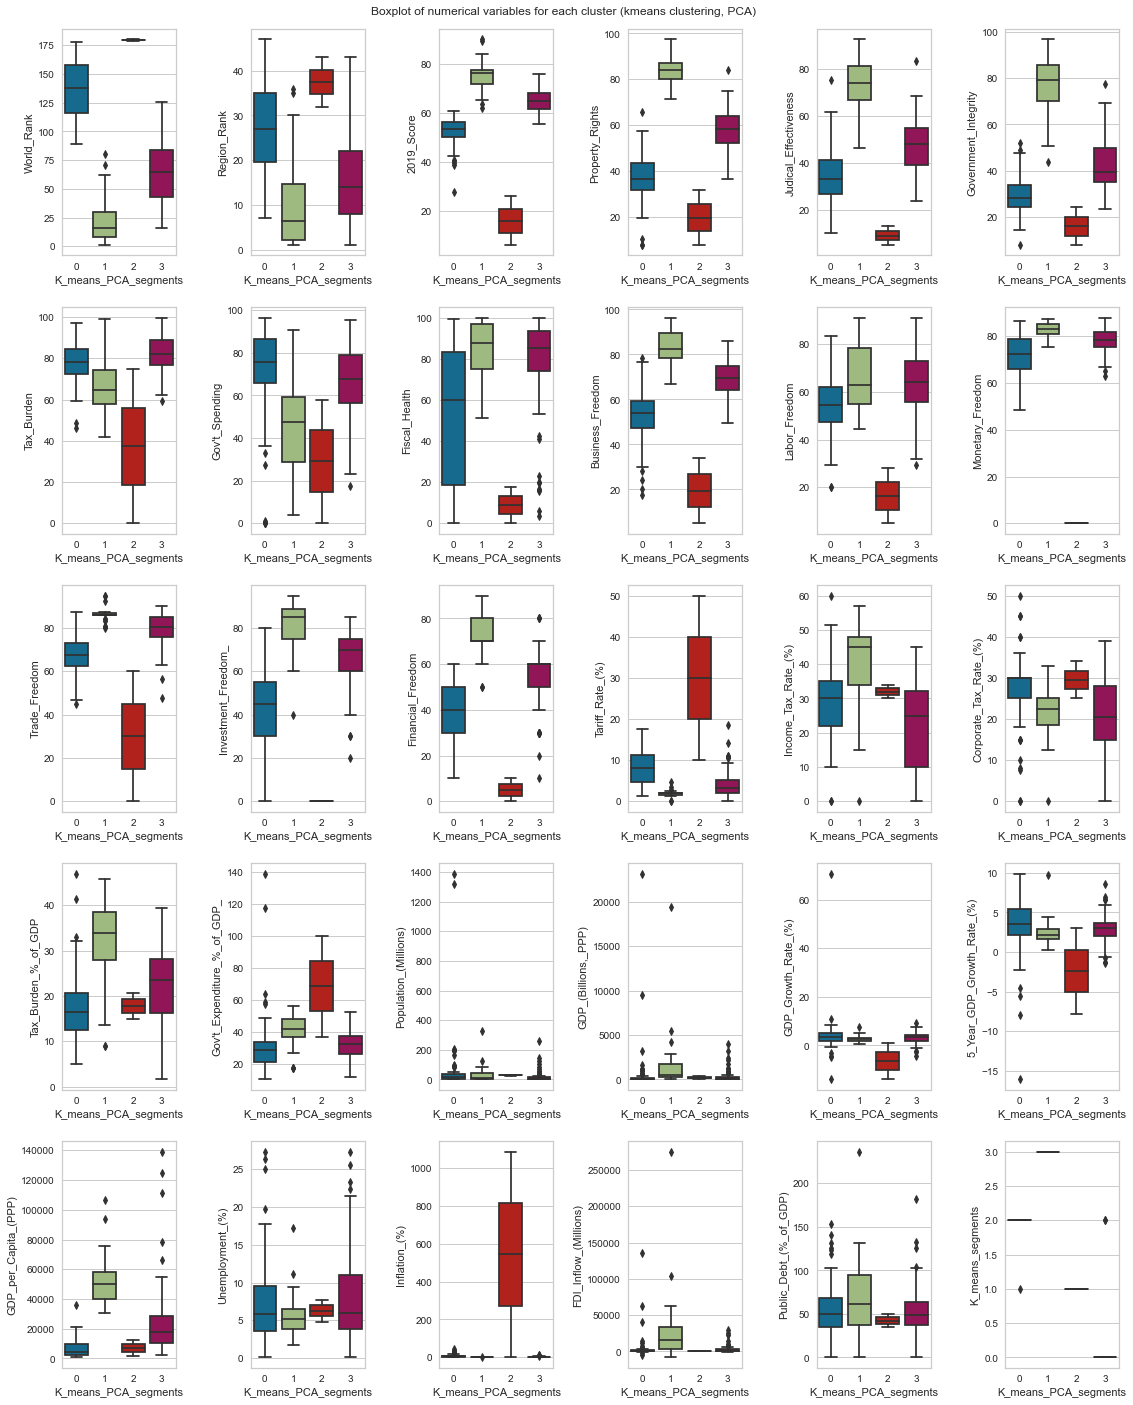

In [387]:
#box plot for each column in 4 clusters
col_attributes = data.iloc[:,3:].columns.tolist()
fig, axes = plt.subplots(5, 6,  figsize=(16, 20))
fig.suptitle('Boxplot of numerical variables for each cluster (kmeans clustering, PCA)')
plot_cntr = 0
for ii in range(5):
    for jj in range(6):
        sns.boxplot(ax=axes[ii][jj],y=data[col_attributes[plot_cntr]],x=data['K_means_PCA_segments'])
        plot_cntr = plot_cntr+1

fig.tight_layout(pad=2.0)

- Cluster 2:
    - Lowest mean score in 2019
    - Property Rights, Judicial Effectiveness, Govt Integrity are lowest
    - Tax burden and Govt Spending are lowest
    - Fiscal Health, Business Freedom, Labor Freedom, Monetary Freedom, Trade Freedom, Investment Freedom, Financial Freedom are the lowest
    - Tariff Rate % is the highest
    - Tax Burden % of GDP is the lowest
    - Income Rate % is average
    - Corporate Tax Rate is the highest 
    - Govt Expenditure of GDP % is the highest
    - Population is average
    - GDP is the lowest
    - GDP growth rate % is the lowest
    - 5 year growth rate is lowest
    - GDP per capita is the lowest
    - Unemployment % is the average 
    - Inflation % is the highest
    - FDI Inflow in millions is the lowest 
    - Public Debt % of GDP is lowest

- Cluster 0:
    - Has mean score 52 in 2019
    - Property Rights are not so high
    - Tax burden is high but not highest
    - Govt Spending is the highest
    - Fiscal Health, Business Freedom, Labor Freedom are average
    - Monetary Freedom is average
    - Trade Freedom is average
    - Investment Freedom and Financial Freedom are average
    - Tariff Rate %, Income Rate %, Corporate Tax Rate,  are the average
    - Tax Burden % of GDP is lowest
    - Govt Expenditure of GDP % is lowest
    - Population is the highest
    - GDP is average
    - GDP growth rate % is highest
    - 5 year growth rate is the highest
    - GDP per capita is average
    - Unemployment %, Inflation %, FDI Inflow in millions is the average
    - Public Debt % of GDP is average

- Cluster 1:
    - Highest mean score 83 in 2019
    - Property Rights and Judicial Effectiveness, Govt integrity is the highest
    - Tax burden is the lowest
    - Govt Spending is the average
    - Fiscal Health, Business Freedom, Labor Freedom, Monetary Freedom, Trade Freedom Investment Freedom and Financial Freedom are the highest
    - Tariff Rate % is the lowest, 
    - Tax Burden % of GDP is the highest
    - Income Rate % is the highest
    - Corporate Tax Rate, Govt Expenditure of GDP % is average
    - Population is average
    - GDP is the highest
    - GDP growth rate % is the average
    - 5 year growth rate is average
    - GDP per capita is the highest
    - Unemployment %, Inflation % is the lowest
    - FDI Inflow in millions and Public Debt % of GDP is the highest

- Cluster 3:
    - Has mean score 65 in 2019
    - Property Rights are average
    - Tax burden is the highest
    - Govt Spending is average
    - Fiscal Health, Business Freedom, Labor Freedom are average
    - Monetary Freedom is high enough
    - Trade Freedom is average
    - Investment Freedom and Financial Freedom are average
    - Tariff Rate %, Tax Burden % of GDP are the average
    - Income Rate %, Corporate Tax Rate are the lowest 
    - Govt Expenditure of GDP % is average
    - Population is the lowest
    - GDP is the average
    - GDP growth rate % is average
    - 5 year growth rate is average
    - GDP per capita is the average
    - Unemployment % is the highest 
    - Inflation % is the average
    - FDI Inflow in millions and Public Debt % of GDP is average

### Hierarchical clustering (before PCA)

In [388]:
#hierarchical clustering. Finding cophenetic coefficient for various distance metrics and linkages metrics

distance_metrics_set = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods_set = ['single', 'complete', 'average', 'weighted'] #linkages

high_cophenet_corr = 0
high_dist_link = [0,0]

coeff = []
distance_met = []
link_met =[]

for dm in distance_metrics_set:
    for lm in linkage_methods_set:
        Z = linkage(scaled_data_eco, metric=dm, method=lm)
        c, coph_dists = cophenet(Z,pdist(scaled_data_eco))
        coeff +=[round(c,2)]
        distance_met+=[dm]
        link_met+=[lm]
        colm = ['Distance Metrics','Linkage Method','Cophenet correlation']
        d = {'Distance Metrics': [distance_met] , 'Linkage Method': [link_met], 'Cophenet correlation':[coeff]}
#         print(len(distance_met), len(link_met), len(coeff))
        CophCorr = pd.DataFrame(data=np.array([distance_met,link_met,coeff ]).T, columns = colm)
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dist_link[0] = dm
            high_dist_link[1] = lm

print('-'*50)
print('Highest cophenatic correlation is {}, obtained with {} distance metric and {} linkage method'.format(round(high_cophenet_corr,2), high_dist_link[0], high_dist_link[1]))
CophCorr

--------------------------------------------------
Highest cophenatic correlation is 0.81, obtained with euclidean distance metric and average linkage method


Distance Metrics Linkage Method Cophenet correlation
0         euclidean         single                 0.67
1         euclidean       complete                 0.53
2         euclidean        average                 0.81
3         euclidean       weighted                  0.5
4         chebyshev         single                 0.67
5         chebyshev       complete                 0.55
6         chebyshev        average                 0.74
7         chebyshev       weighted                 0.74
8       mahalanobis         single                 0.61
9       mahalanobis       complete                 0.49
10      mahalanobis        average                 0.63
11      mahalanobis       weighted                 0.63
12        cityblock         single                 0.66
13        cityblock       complete                 0.57
14        cityblock        average                 0.78
15        cityblock       weighted                 0.62

In [389]:
methods_set = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

compare_cols_feat = ['Linkage', 'Cophenetic Coefficient']

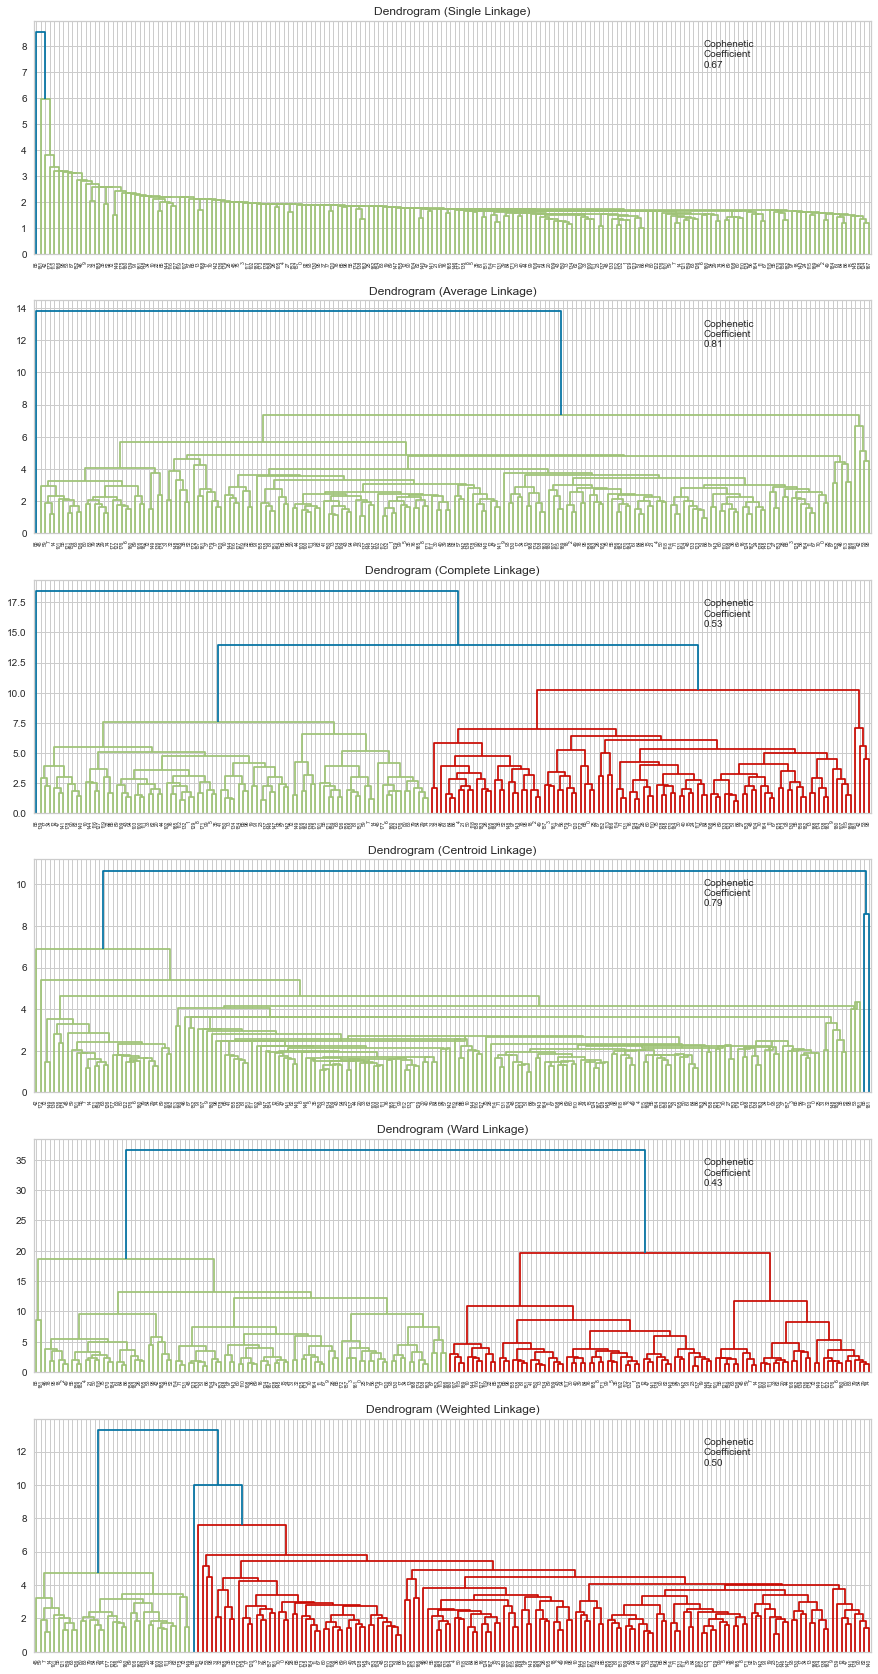

In [390]:
#plotting dendograms
compare_set = []

fig, axs = plt.subplots(len(methods_set), 1, figsize=(15, 30)) #subplot


for i, method in enumerate(methods_set):    
    Z = linkage(scaled_data_eco, metric='euclidean', method=method) #linkage method
    dendrogram(Z, ax=axs[i]); #dendogram
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(scaled_data_eco)) # coefficient
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80), xycoords='axes fraction')
    compare_set.append([method, coph_corr])

In [391]:
df_cc = pd.DataFrame(compare_set, columns=compare_cols_feat)
df_cc

Linkage  Cophenetic Coefficient
0    single                0.671943
1   average                0.805775
2  complete                0.526026
3  centroid                0.786063
4      ward                0.427316
5  weighted                0.500127

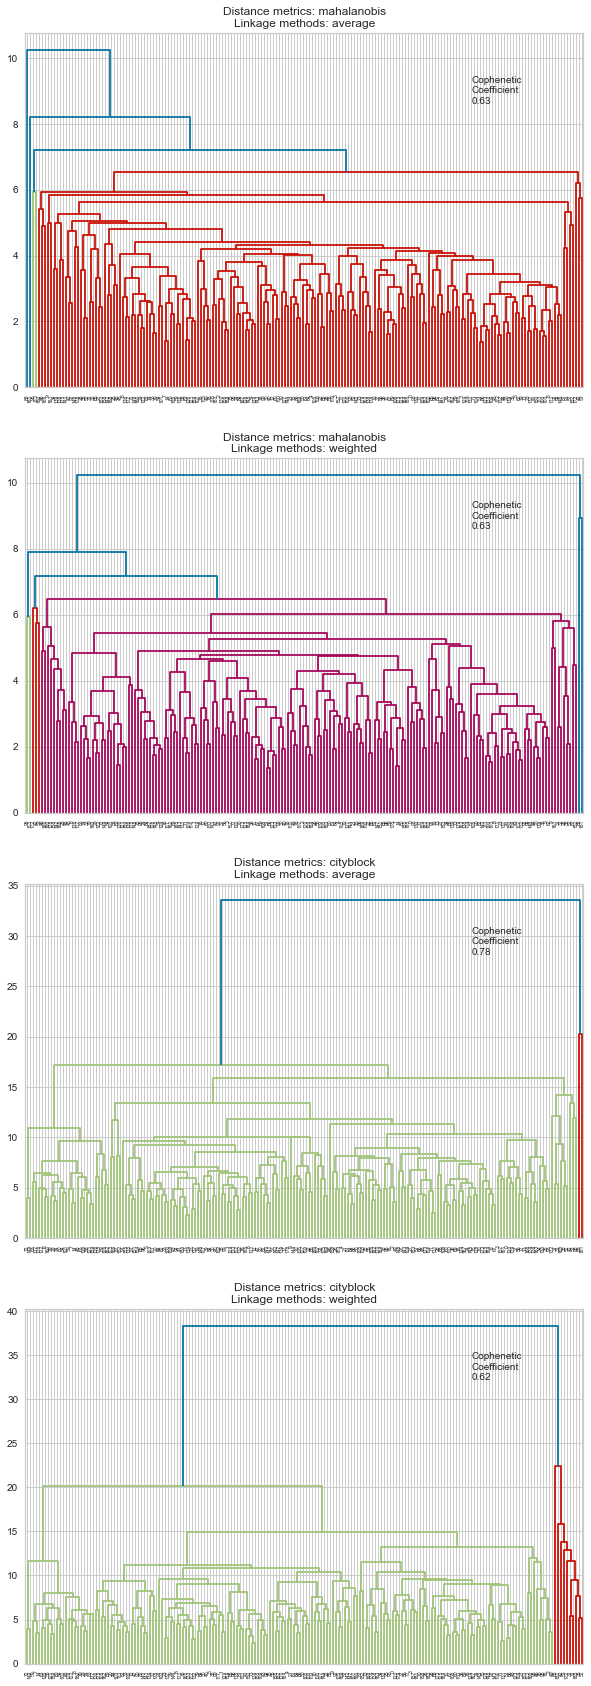

In [392]:
#dendograms

distance_metrics_set = [ 'mahalanobis','cityblock']
linkage_methods_set = ['average', 'weighted']

fig, axs = plt.subplots(len(distance_metrics_set)+len(distance_metrics_set), 1, figsize=(10, 30))
i=0

#plot
compare_cols_feat = ['Distance','Linkage', 'Cophenetic Coefficient']
compare_set = []
for dm in distance_metrics_set:
    for lm in linkage_methods_set:
        Z = linkage(scaled_data_eco, metric=dm, method=lm)
        dendrogram(Z,  ax=axs[i]);
        axs[i].set_title('Distance metrics: {}\nLinkage methods: {}'.format(dm,lm))
        coph_corr, coph_dist = cophenet(Z, pdist(scaled_data_eco))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                        (0.80, 0.80),
                        xycoords='axes fraction')
        axs[i].set_title('Distance metrics: {}\nLinkage methods: {}'.format(dm,lm))                        
        i +=1
        compare_set.append([dm, lm, round(coph_corr,2)])

In [393]:
df_temp = pd.DataFrame(compare_set, columns=compare_cols_feat)
df_temp

Distance   Linkage  Cophenetic Coefficient
0  mahalanobis   average                    0.63
1  mahalanobis  weighted                    0.63
2    cityblock   average                    0.78
3    cityblock  weighted                    0.62

In [394]:
#final hierarchical clustering before PCA
Hier_Clus_model = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='complete')
Hier_Clus_model.fit(scaled_data_eco)
scaled_data_eco['HC_Clusters'] = Hier_Clus_model.labels_
data['HC_Clusters'] = Hier_Clus_model.labels_
data.head()

CountryID Country_Name                        Region  World_Rank  \
0          1  Afghanistan                  Asia-Pacific       152.0   
1          2      Albania                        Europe        52.0   
2          3      Algeria  Middle East and North Africa       171.0   
3          4       Angola            Sub-Saharan Africa       156.0   
4          5    Argentina                      Americas       148.0   

   Region_Rank  2019_Score  Property_Rights  Judical_Effectiveness  \
0         39.0        51.5             19.6                   29.6   
1         27.0        66.5             54.8                   30.6   
2         14.0        46.2             31.6                   36.2   
3         33.0        50.6             35.9                   26.6   
4         26.0        52.2             47.8                   44.5   

   Government_Integrity  Tax_Burden  ...  GDP_Growth_Rate_(%)  \
0                  25.2        91.7  ...                  2.5   
1                  40.4        86.3  ...                  3.9   
2                  28.9        76.4  ...                  2.0   
3                  20.5        83.9  ...                  0.7   
4                  33.5        69.3  ...                  2.9   

   5_Year_GDP_Growth_Rate_(%)  GDP_per_Capita_(PPP)  Unemployment_(%)  \
0                         2.9                1958.0               8.8   
1                         2.5               12507.0              13.9   
2                         3.1               15237.0              10.0   
3                         2.9                6753.0               8.2   
4                         0.7               20876.0               8.7   

   Inflation_(%)  FDI_Inflow_(Millions)  Public_Debt_(%_of_GDP)  \
0            5.0                   53.9                     7.3   
1            2.0                 1119.1                    71.2   
2            5.6                 1203.0                    25.8   
3           31.7                -2254.5                    65.3   
4           25.7                11857.0                    52.6   

   K_means_segments  K_means_PCA_segments  HC_Clusters  
0                 2                     0            0  
1                 0                     3            2  
2                 2                     0            0  
3                 2                     0            0  
4                 2                     0            0  

[5 rows x 35 columns]

In [395]:
#cluster profiles with mean
profile_clusters_hc = data.groupby('HC_Clusters').mean()
profile_clusters_hc['count_in_each_H_segments'] = data.groupby('HC_Clusters')['2019_Score'].count().values
# print the dataset with max and min in each column
profile_clusters_hc.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'lightblue',axis=0)

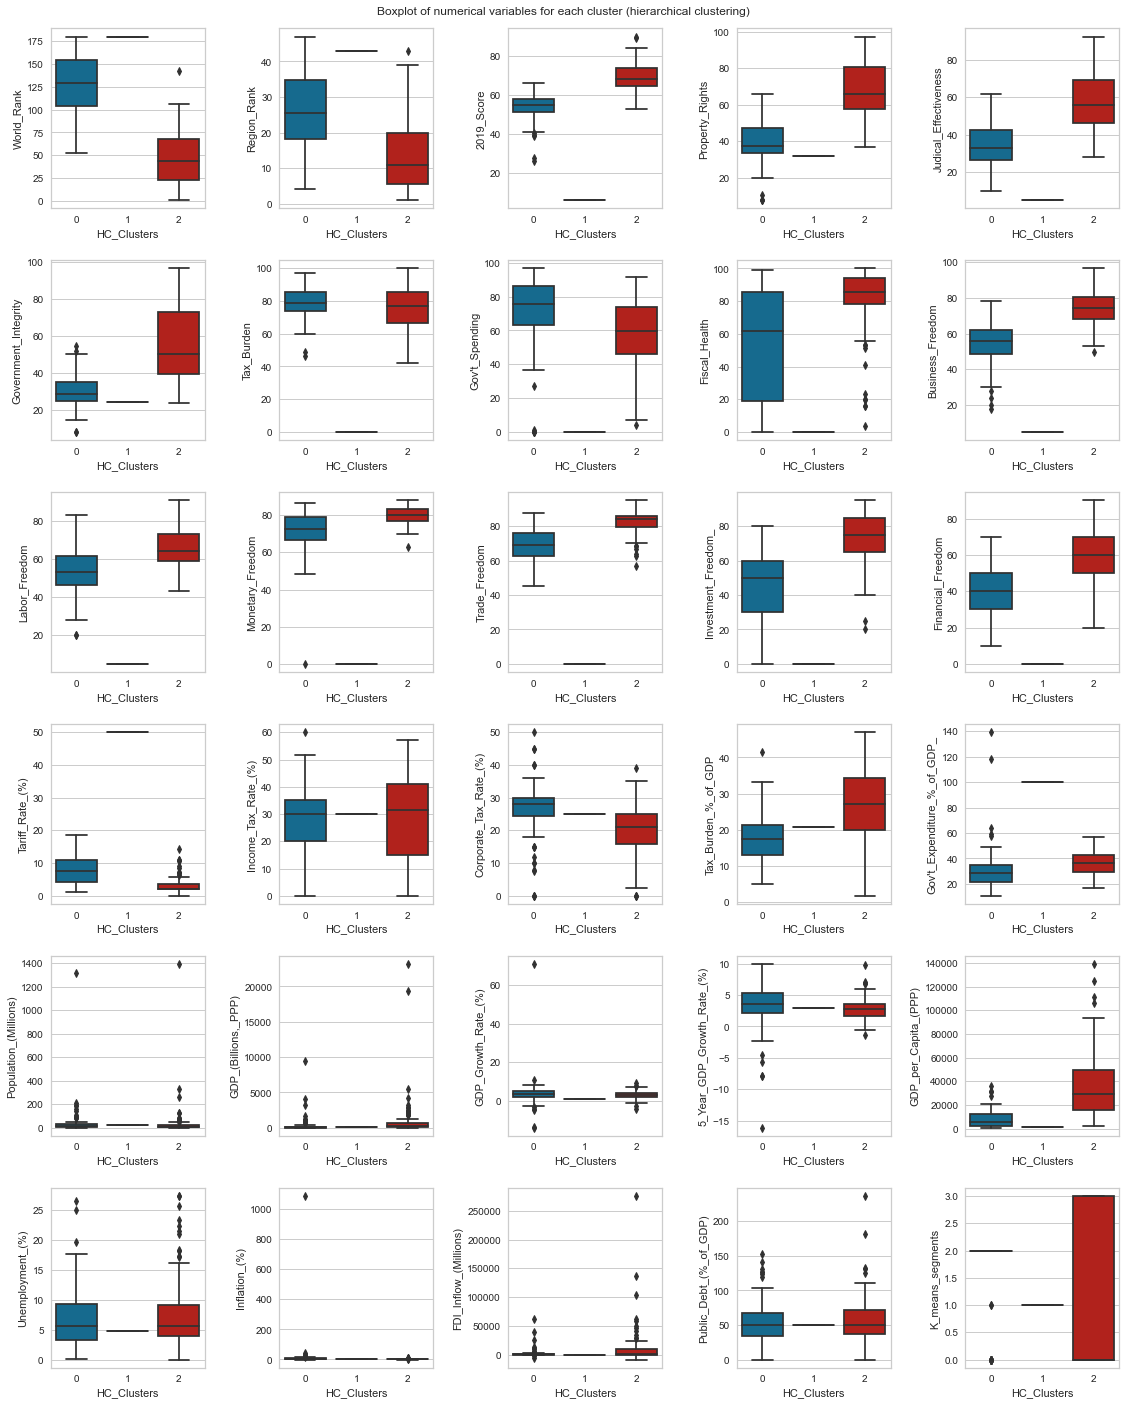

In [396]:
#boxplot of the hierarchical clustering before pca
fig, axes = plt.subplots(6, 5,  figsize=(16, 20))
fig.suptitle('Boxplot of numerical variables for each cluster (hierarchical clustering)')
plot_cntr = 0
for b in range(6):
    for cc in range(5):
        sns.boxplot(ax=axes[b][cc],y=data[col_attributes[plot_cntr]],x=data['HC_Clusters'])
        plot_cntr = plot_cntr+1

fig.tight_layout(pad=2.0)

## PCA with HC

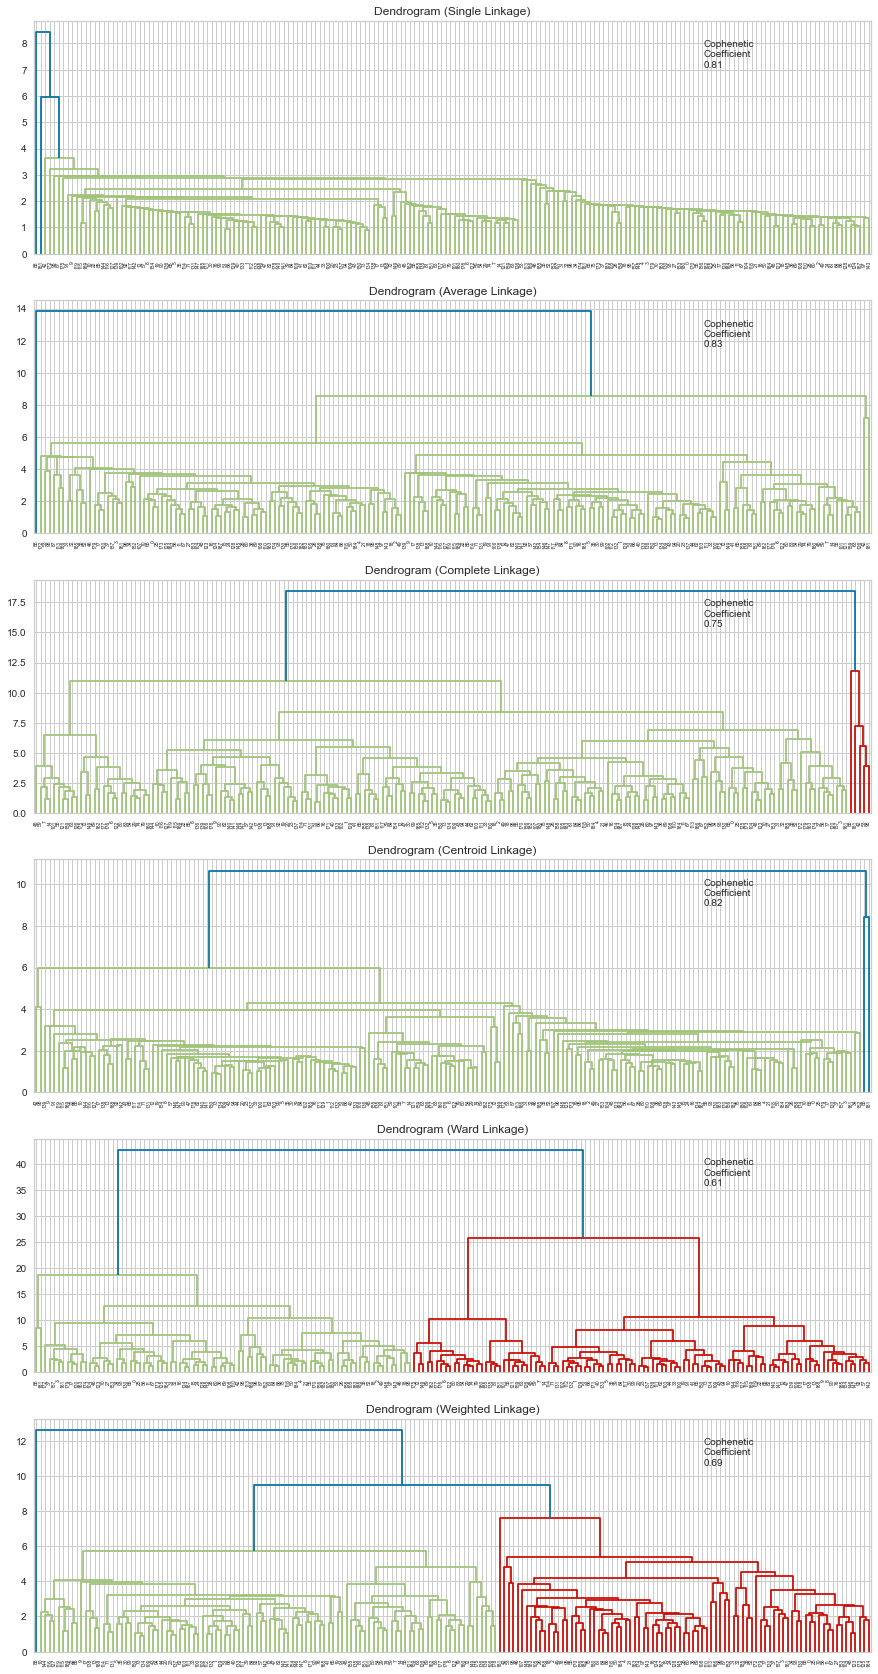

In [397]:
#dendogram
compare_set = []

fig, axs = plt.subplots(len(methods_set), 1, figsize=(15, 30))

#linkage, dendogram and cophenatic coefficient for euclidean distance metric
for i, method in enumerate(methods_set):
    
    Z = linkage(scaled_PCA_eco_data, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(scaled_PCA_eco_data))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80), xycoords='axes fraction')
    compare_set.append([method, coph_corr])

In [398]:
#final hierarchical clustering with PCA
Hier_Clus_model = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
Hier_Clus_model.fit(scaled_PCA_eco_data)
scaled_PCA_eco['HC_Clusters_PCA'] = Hier_Clus_model.labels_
data['HC_Clusters_PCA'] = Hier_Clus_model.labels_
data.head()

CountryID Country_Name                        Region  World_Rank  \
0          1  Afghanistan                  Asia-Pacific       152.0   
1          2      Albania                        Europe        52.0   
2          3      Algeria  Middle East and North Africa       171.0   
3          4       Angola            Sub-Saharan Africa       156.0   
4          5    Argentina                      Americas       148.0   

   Region_Rank  2019_Score  Property_Rights  Judical_Effectiveness  \
0         39.0        51.5             19.6                   29.6   
1         27.0        66.5             54.8                   30.6   
2         14.0        46.2             31.6                   36.2   
3         33.0        50.6             35.9                   26.6   
4         26.0        52.2             47.8                   44.5   

   Government_Integrity  Tax_Burden  ...  5_Year_GDP_Growth_Rate_(%)  \
0                  25.2        91.7  ...                         2.9   
1                  40.4        86.3  ...                         2.5   
2                  28.9        76.4  ...                         3.1   
3                  20.5        83.9  ...                         2.9   
4                  33.5        69.3  ...                         0.7   

   GDP_per_Capita_(PPP)  Unemployment_(%)  Inflation_(%)  \
0                1958.0               8.8            5.0   
1               12507.0              13.9            2.0   
2               15237.0              10.0            5.6   
3                6753.0               8.2           31.7   
4               20876.0               8.7           25.7   

   FDI_Inflow_(Millions)  Public_Debt_(%_of_GDP)  K_means_segments  \
0                   53.9                     7.3                 2   
1                 1119.1                    71.2                 0   
2                 1203.0                    25.8                 2   
3                -2254.5                    65.3                 2   
4                11857.0                    52.6                 2   

   K_means_PCA_segments  HC_Clusters  HC_Clusters_PCA  
0                     0            0                0  
1                     3            2                1  
2                     0            0                0  
3                     0            0                0  
4                     0            0                0  

[5 rows x 36 columns]

In [399]:
#clustering profiling
profile_clusters_hc = data.groupby('HC_Clusters_PCA').mean()

profile_clusters_hc['count_in_each_H_segments'] = data.groupby('HC_Clusters_PCA')['World_Rank'].count().values
# printing max and min in each column
profile_clusters_hc.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'lightblue',axis=0)

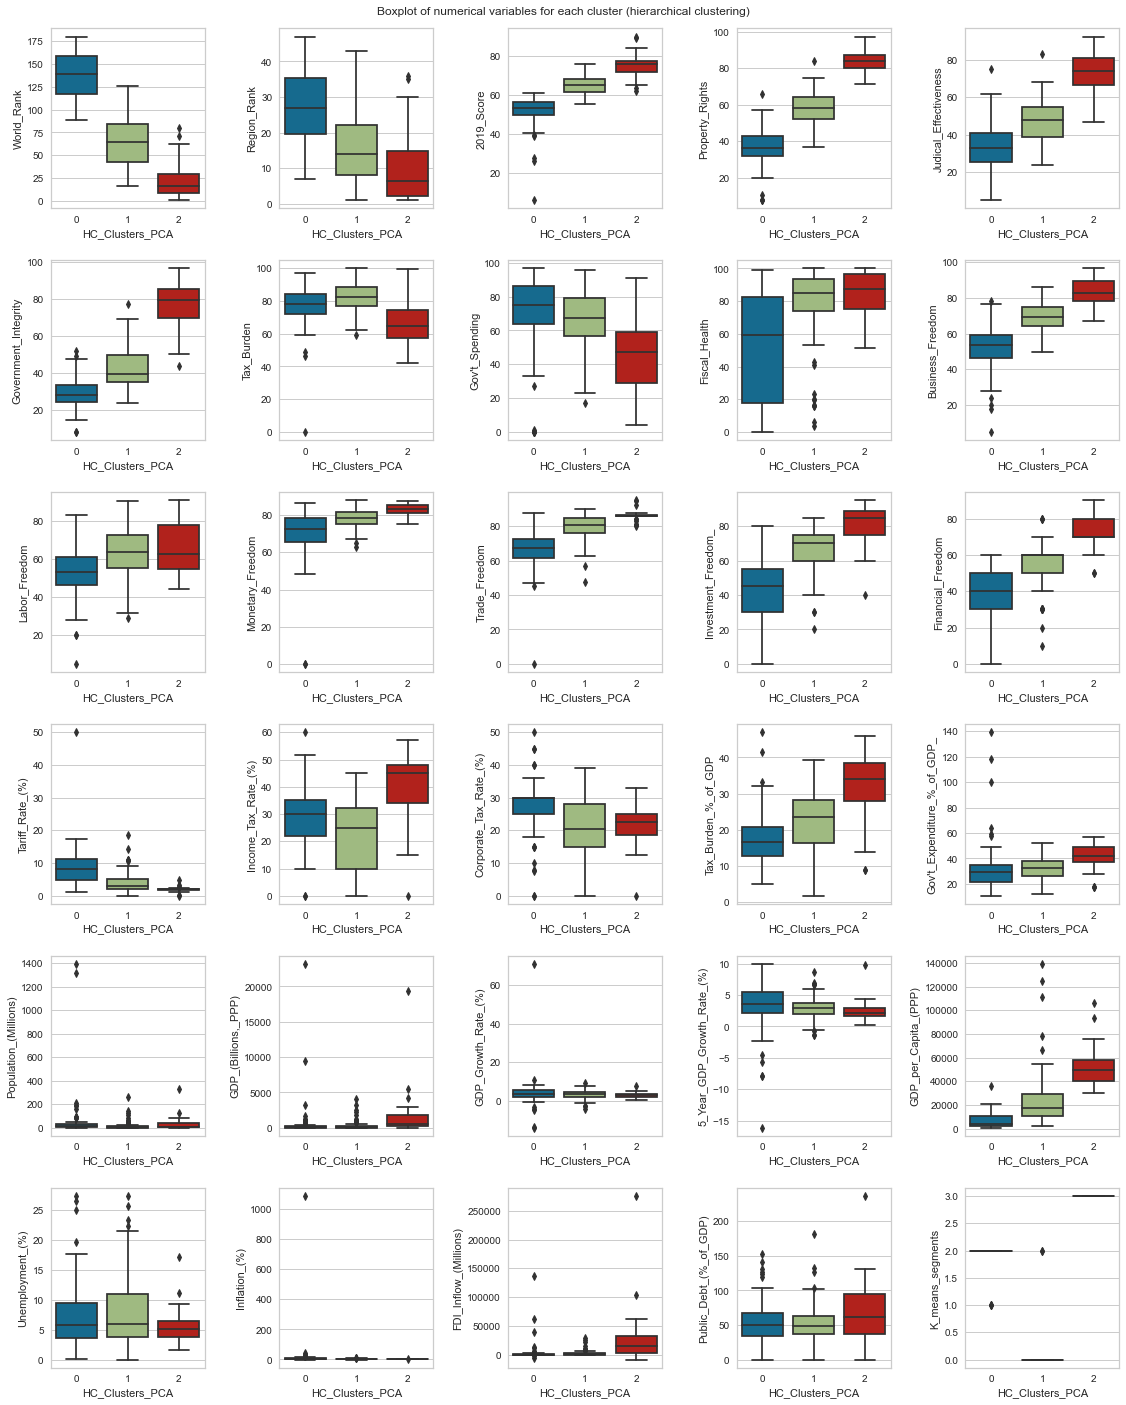

In [400]:
#boxplot clustering after PCA
fig, axes = plt.subplots(6, 5,  figsize=(16, 20))
fig.suptitle('Boxplot of numerical variables for each cluster (hierarchical clustering)')
plot_cntr = 0
for b in range(6):
    for cc in range(5):
        sns.boxplot(ax=axes[b][cc],y=data[col_attributes[plot_cntr]],x=data['HC_Clusters_PCA'])
        plot_cntr = plot_cntr+1

fig.tight_layout(pad=2.0)

## Clustering analysis for the whole dataset 
- KMeans clustering with dataset where PCA is performed is used for further analysis

Cluster 2 (very low economic freedom):
- Countries like Venezuela are in cluster 2
- Lowest economic freedom in 2019
- These countries are also low in world ranking
- All factors for the calculation of economic freedom are either the lowest or average values
- Tariff Rate %, Corporate Tax Rate, Govt expenditure of GDP%, and inflation % are the highest. 
- These can be the reason that the GDP is the lowest and the economic freedom is lowest


Cluster 0 (average economic freedom):
- Countries like , India, Egypt, Argentina are in cluster 0
- Average economic freedom in 2019
- These countries are also average in world ranking
- Factors for the calculation of economic freedom are the average values
- Tariff Rate %, Tax Burden of GDP, unemployment, inflation % are the lowest/average
- GDP, FDI inflow and public debt of GDP is the highest
- Population is the highest
- Corporate Tax Rate, Govt expenditure of GDP%, are the lowest or average. 

Cluster 3 (average economic freedom):
- Countries like Mexico, Croatia, Qatar are in cluster 0
- Average economic freedom
- Population is the lowest
- Unemployment is the highest


Cluster 0 and 3 have differences in population and unemployment. 


Cluster 1 (highest economic freedom):
- Countries like United States, UAE, Hong Kong, Canada are in cluster 1
- Highest economic freedom in 2019
- These countries are also high in world ranking
- Factors for the calculation of economic freedom are the highest values
- Tariff Rate %, Tax Burden of GDP, unemployment, inflation % are the lowest/average
- GDP, FDI inflow and public debt of GDP is the highest
- Corporate Tax Rate, Govt expenditure of GDP%, are average. 
- These can be the reason that the GDP per capita and the economic freedom is the highest



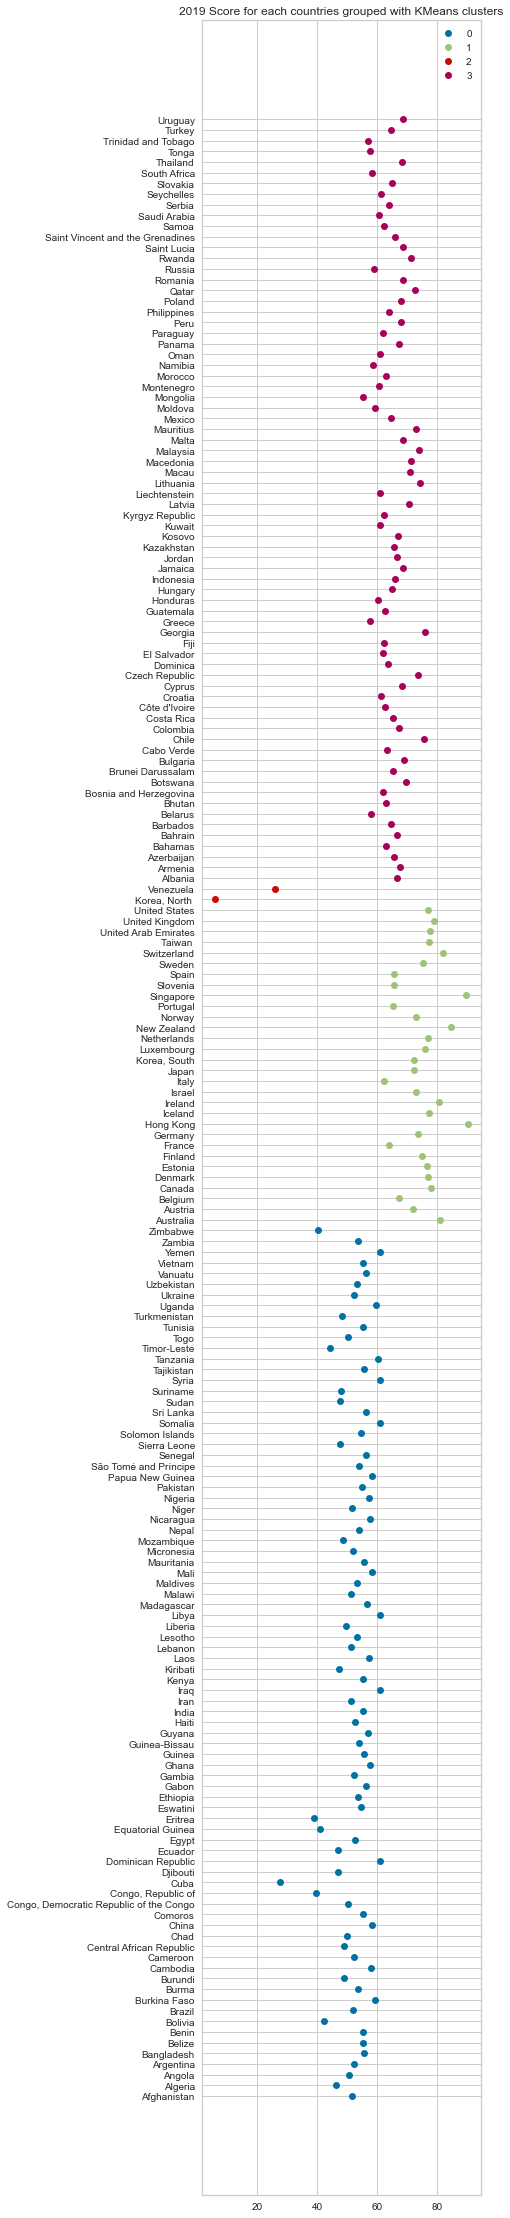

In [401]:
plt.figure(figsize=(5,40))
plt.title("2019 Score for each countries grouped with KMeans clusters")
groups = data.groupby("K_means_PCA_segments")
for name, group in groups:
    plt.plot(group["2019_Score"], group["Country_Name"],marker="o", linestyle="",label=name)
plt.legend()

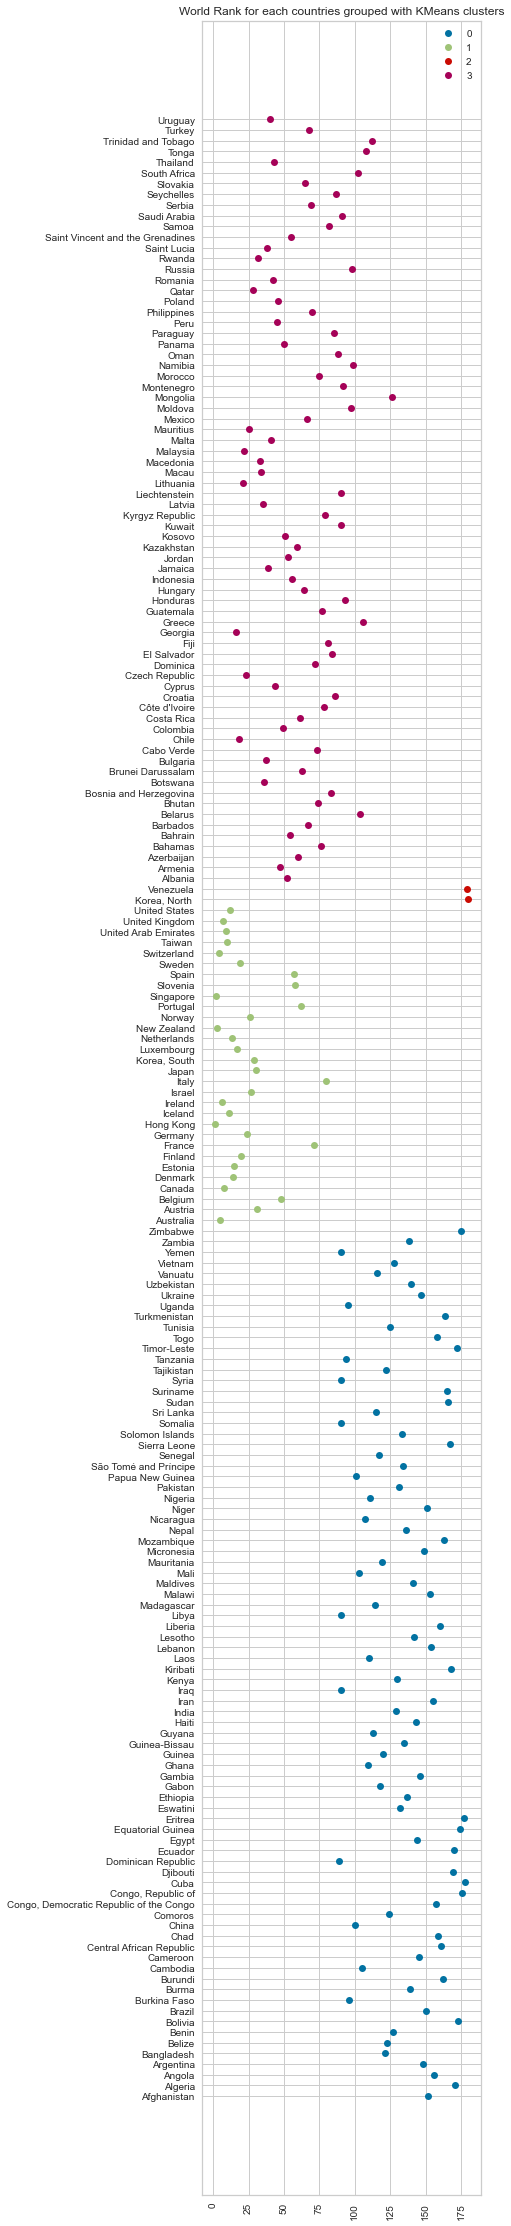

In [402]:
plt.figure(figsize=(5,40))
plt.title("World Rank for each countries grouped with KMeans clusters")
groups = data.groupby("K_means_PCA_segments")
for name, group in groups:
    
    plt.plot(group["World_Rank"], group["Country_Name"], marker="o", linestyle="",label=name)
    plt.xticks(rotation=90, fontsize=10)
plt.legend()

### References:
1. The Heritage Foundation: https://www.heritage.org/index. 
2. https://en.wikipedia.org/wiki/Index_of_Economic_Freedom
3. https://en.wikipedia.org/wiki/K-means_clustering
4. https://tcdata360.worldbank.org/indicators/prop.rgt.scr?country=BRA&indicator=750&viz=line_chart&years=2013,2018